In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import mglearn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 데이터 EDA

### 데이터 불러오기

In [2]:
df = pd.read_csv('final_dataset.csv', encoding='EUC-KR') # 각자 경로 따라 수정. 인코딩 필요없을수도있음

### 데이터 기초 정보 확인

In [3]:
df.shape  # 전체 900행으로 나타남

(14810, 16)

In [4]:
df.info() 
# 학점 ~ 봉사까지 전부 int나 float이 아닌 object인 것을 확인할 수 있음. 이는 점수 뒤에 붙은 조사 때문으로 보임
# 학점은 float, 나머지는 int로 변환할 필요가 있음

# 또한 전부 non-null이지만 900행이 아닌 열이 일부 관측됨. 기업분류, 지원분야, 전공 분야에 대한 구체적 확인이 필요함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14810 entries, 0 to 14809
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기업명     14810 non-null  object
 1   지원분야    13779 non-null  object
 2   학교      14808 non-null  object
 3   전공      12563 non-null  object
 4   학점      14810 non-null  object
 5   토익      14810 non-null  object
 6   오픽      14810 non-null  object
 7   토스      14810 non-null  object
 8   자격증     14809 non-null  object
 9   연수      14810 non-null  object
 10  봉사      14810 non-null  object
 11  인턴      14810 non-null  object
 12  업종      14810 non-null  object
 13  업종분류    14810 non-null  int64 
 14  기업규모    14810 non-null  object
 15  규모분류    14810 non-null  int64 
dtypes: int64(2), object(14)
memory usage: 1.8+ MB


In [5]:
df.describe() # int 타입이 아닌 object 타입이라 제대로 값이 산출되지 않음

,업종분류,규모분류
count,14810.000000,14810.000000
mean,10.605334,2.995881
std,5.317740,1.169039
min,1.000000,1.000000
25%,7.000000,2.000000
50%,11.000000,4.000000
75%,14.000000,4.000000
max,19.000000,4.000000


In [6]:
df.isnull().sum() # 빈 행 갯수만큼 각 열에서 null값이 관측됨. 해당 데이터 결측치에 대한 전처리가 필요할 것으로 판단됨.

기업명        0
지원분야    1031
학교         2
전공      2247
학점         0
토익         0
오픽         0
토스         0
자격증        1
연수         0
봉사         0
인턴         0
업종         0
업종분류       0
기업규모       0
규모분류       0
dtype: int64

### 데이터 타입 변경 및 기초 전처리

In [7]:
# 영어점수는 토익, 토익스피킹, 오픽중 하나만 따는 경향이 있음. 따라서 비어있는 경우가 많으므로 세 열을 하나로 합치는게 나을 것으로 보임
# 토익스피킹과 오픽 점수는 토익 점수로 환산이 가능함. 따라서 토익 점수 분류에 따라 토익스피킹과 오픽 점수를 변환함
eng = {'-' : 0, 'Lv1' : 100, 'Lv2' : 200, 'Lv3' : 300, 'NL' : 100, 'NH' : 300, 'Lv4' : 440, 'IL' : 440, 'Lv5' : 600, '5' : 600, 'IM1' : 570, 
       'Lv6' : 775, 'IM2' : 745, 'IM3' : 845, '13' : 845, 'Lv7' : 915, 'IH' : 915, 'Lv8' : 975, 'AL' : 975, 'AM' : 990, 'AH' : 990,
       'IM': 570, 'M1' : 570, 'M2' : 745,
       '없음' : 0, 'Level 2' : 200, 'Level 3' : 300, 'Level 4' : 440,'Level 5' : 600,'Level 6' : 775,'Level 7' : 915 ,'Level 8' : 975
      }
df = df.replace(to_replace=eng)

In [8]:
df.head()
# 확인결과 정상적으로 변환된 것을 알 수 있음. 
#단, 일부 열이 아닌 전체 열에 변환과정을 진행한 것으로 타 행에서 '-'가 0으로 변환되었을 수 있음
# 따라서 추후 시각화 과정에서 다른 열, 특히 회사명~전공 등 str 열에 0값이 나타나는지 확인이 필요함
# 특히 결측치가 확인되었었던 전공, 기업분류, 지원분야 열을 주의깊게 확인

,기업명,지원분야,학교,전공,학점,토익,오픽,토스,자격증,연수,봉사,인턴,업종,업종분류,기업규모,규모분류
0,아워홈,법인영업,대졸4년제,중국어과,3.5,0,0,0,0,1회,0,0,음식료/호텔/리조트/여행,10,중견기업,2
1,아워홈,재무담당자,수도권4년제,중어중문과,3.57,900점,0,975,4개,2회,0,0,음식료/호텔/리조트/여행,10,중견기업,2
2,아워홈,바이오·제약연구원,대학원,화공생명공학과,4.19,800점,0,775,4개,1회,0,1회,음식료/호텔/리조트/여행,10,중견기업,2
3,아워홈,바이오·제약연구원,대학원,화공생명공학과,4.19,800점,0,775,4개,1회,0,1회,음식료/호텔/리조트/여행,10,중견기업,2
4,아워홈,온라인마케터,수도권4년제,문화경영학과,3.63,950점,0,775,1개,1회,3회,2회,음식료/호텔/리조트/여행,10,중견기업,2


In [9]:
# 숫자형 데이터에서 '점', '개', '회' 등을 떼어내는 코드
df['토익'] = df['토익'].str.extract(r'(\d+)')
#df['외국어'] = df['외국어'].str.extract(r'(\d+)')
df['자격증'] = df['자격증'].str.extract(r'(\d+)')
#df['해외경험'] = df['해외경험'].str.extract(r'(\d+)')
df['인턴'] = df['인턴'].str.extract(r'(\d+)')
#df['수상내역'] = df['수상내역'].str.extract(r'(\d+)')
df['봉사'] = df['봉사'].str.extract(r'(\d+)')
df['연수'] = df['연수'].str.extract(r'(\d+)')
df = df.fillna(0)
df = df.astype({'학점' : 'float', '토익':'int32', '자격증':'int32', '인턴':'int32', '봉사':'int32' , '연수':'int32'})

In [10]:
df.info() 
# 정상적으로 데이터 타입이 변경되었음을 확인할 수 있음. 
#단, 아까 우려한 대로 결측치가 사라짐. 해당 결측치들에 0값이 들어갔을것으로 추측됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14810 entries, 0 to 14809
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     14810 non-null  object 
 1   지원분야    14810 non-null  object 
 2   학교      14810 non-null  object 
 3   전공      14810 non-null  object 
 4   학점      14810 non-null  float64
 5   토익      14810 non-null  int32  
 6   오픽      14810 non-null  int64  
 7   토스      14810 non-null  int64  
 8   자격증     14810 non-null  int32  
 9   연수      14810 non-null  int32  
 10  봉사      14810 non-null  int32  
 11  인턴      14810 non-null  int32  
 12  업종      14810 non-null  object 
 13  업종분류    14810 non-null  int64  
 14  기업규모    14810 non-null  object 
 15  규모분류    14810 non-null  int64  
dtypes: float64(1), int32(5), int64(4), object(6)
memory usage: 1.5+ MB


In [11]:
df.describe() 
# 외국어, 해외경험, 인턴, 봉사는 상위 75%값도 눈에띄게 낮으며, 특히 외국어의 경우 상위 75%도 0을 기록함
# 분석에 필수적인 자료가 아닐것으로 판단되므로 제외하는것이 나을것으로 판단됨

,학점,토익,오픽,토스,자격증,연수,봉사,인턴,업종분류,규모분류
count,14810.000000,14810.000000,14810.000000,14810.000000,14810.000000,14810.000000,14810.000000,14810.000000,14810.000000,14810.000000
mean,3.367169,578.219514,240.012492,284.910533,1.447333,0.376165,0.560162,0.328089,10.605334,2.995881
std,1.101730,394.912070,317.809330,379.461486,1.674575,0.775032,1.174863,0.938259,5.317740,1.169039
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000
50%,3.670000,800.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,11.000000,4.000000
75%,3.910000,880.000000,440.000000,775.000000,2.000000,1.000000,1.000000,0.000000,14.000000,4.000000
max,4.500000,990.000000,975.000000,990.000000,16.000000,14.000000,16.000000,11.000000,19.000000,4.000000


In [12]:
df.isnull().sum()

기업명     0
지원분야    0
학교      0
전공      0
학점      0
토익      0
오픽      0
토스      0
자격증     0
연수      0
봉사      0
인턴      0
업종      0
업종분류    0
기업규모    0
규모분류    0
dtype: int64

In [13]:
#라벨인코딩하기 위해서 str형변환
df = df.astype({'학교' : 'str' , '전공' : 'str'})
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14810 entries, 0 to 14809
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     14810 non-null  object 
 1   지원분야    14810 non-null  object 
 2   학교      14810 non-null  object 
 3   전공      14810 non-null  object 
 4   학점      14810 non-null  float64
 5   토익      14810 non-null  int32  
 6   오픽      14810 non-null  int64  
 7   토스      14810 non-null  int64  
 8   자격증     14810 non-null  int32  
 9   연수      14810 non-null  int32  
 10  봉사      14810 non-null  int32  
 11  인턴      14810 non-null  int32  
 12  업종      14810 non-null  object 
 13  업종분류    14810 non-null  int64  
 14  기업규모    14810 non-null  object 
 15  규모분류    14810 non-null  int64  
dtypes: float64(1), int32(5), int64(4), object(6)
memory usage: 1.5+ MB


In [14]:
df['학교'].unique

<bound method Series.unique of 0         대졸4년제
1        수도권4년제
2           대학원
3           대학원
4        수도권4년제
          ...  
14805       초대졸
14806     서울4년제
14807       초대졸
14808       초대졸
14809     부산대학교
Name: 학교, Length: 14810, dtype: object>

In [15]:
labels, unique_values = pd.factorize(df['학교'])
print(labels.max)

<built-in method max of numpy.ndarray object at 0x000001F98A810A50>


In [16]:
print(unique_values)

Index(['대졸4년제', '수도권4년제', '대학원', '서울4년제', '고졸', '초대졸', '지방4년제', '아주대학교',
       '전북대학교', '한양대학교(안산)',
       ...
       '배재대학교', 'Marshall University',
       'The School of the Art Institute of Chicago', '영진전문대학교-신재생에너지',
       'University of Melbourne', 'Oklahoma State University', '군산대학교',
       '복단대학교', 'Auburn University Montgomery', 'SOOCHOW university'],
      dtype='object', length=249)


In [17]:
# 범주형 데이터 라벨 인코딩
# 사용할 열만 라벨 인코딩을 진행함
# object 열 [회사명, 기업분류, 시기, 지원분야, 대학, 계열, 전공] 
# 회사명은 추구 기업 규모와 합쳐져 y값에 들어갈 내용이므로 제외, 기업분류도 분류코드와 내용이 중복되므로 제외
# 지원분야는 고려하지 않을것이므로 제외 , 시기도 시계열분석을 진행하지 않을것이므로 제외
# 따라서 대학, 계열, 전공만 숫자형 데이터로 인코딩을 진행함

#### 오류발생!
# 오류를 확인해보면, str과 int 중 하나만 넣어야하는데 둘다 들어갔다고 되어있다.
# 아까 확인해봤던 내용중, 전공에 결측치 하나 있던게 0으로 채워졌다는 얘기가 있었다
# 따라서 '전공' 열에 들어있는 0값을 제거(str값으로 교체)해주면 오류가 안날것

df = df[df.전공 != 0] # 일단 그냥 지워버림
lb = LabelEncoder()
school_lb = lb.fit_transform(df['학교'])
major_lb = lb.fit_transform(df['전공'])

df['학교'] = school_lb
#df['계열'] = lb.fit_transform(df['계열'])
df['전공'] = major_lb


'''
label인코딩을 사용하는 이유
구현한계때문에 어쩔수 없이 label인코딩을 사용
->
범위형 데이터에 대해서 원핫인코딩을 사용하면 좋긴하나
데이터 범위별로 컬럼을 생성을해야하기 그러면 컬럼의 개수가 불필요하게 늘어남에 따라
데이터처리하는데 힘들기때문에 label인코딩을 사용함

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False) # 객체 생성   sparse=False :array  sparse=True:Matrix 
#data_pd['시기_onehot'] = ohe.fit_transform(data_pd['시기'].values.reshape(-1, 1))

encoded_columns = ohe.fit_transform(data_pd[['시기']])
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(['시기']))

data_pd = pd.concat([data_pd, encoded_df], axis=1)
data_pd
'''
# label 인코딩과 원핫 인코딩중 무얼 사용할지도 생각해보기
# 라벨인코딩의 경우 단순히 라벨링해서 숫자 1부터 쭈루룩 달아주는건데 모델에 따라서 숫자가 높을수록 관련이 높다고 해석될 여지도 있음!

"\nlabel인코딩을 사용하는 이유\n구현한계때문에 어쩔수 없이 label인코딩을 사용\n->\n범위형 데이터에 대해서 원핫인코딩을 사용하면 좋긴하나\n데이터 범위별로 컬럼을 생성을해야하기 그러면 컬럼의 개수가 불필요하게 늘어남에 따라\n데이터처리하는데 힘들기때문에 label인코딩을 사용함\n\nfrom sklearn.preprocessing import OneHotEncoder\n\nohe = OneHotEncoder(sparse=False) # 객체 생성   sparse=False :array  sparse=True:Matrix \n#data_pd['시기_onehot'] = ohe.fit_transform(data_pd['시기'].values.reshape(-1, 1))\n\nencoded_columns = ohe.fit_transform(data_pd[['시기']])\nencoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(['시기']))\n\ndata_pd = pd.concat([data_pd, encoded_df], axis=1)\ndata_pd\n"

In [18]:
df.info() # 아까 전공계열에 있던 결측치 갯수만큼 전체 열의 행이 감소한 것을 확인해볼 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14810 entries, 0 to 14809
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     14810 non-null  object 
 1   지원분야    14810 non-null  object 
 2   학교      14810 non-null  int32  
 3   전공      14810 non-null  int32  
 4   학점      14810 non-null  float64
 5   토익      14810 non-null  int32  
 6   오픽      14810 non-null  int64  
 7   토스      14810 non-null  int64  
 8   자격증     14810 non-null  int32  
 9   연수      14810 non-null  int32  
 10  봉사      14810 non-null  int32  
 11  인턴      14810 non-null  int32  
 12  업종      14810 non-null  object 
 13  업종분류    14810 non-null  int64  
 14  기업규모    14810 non-null  object 
 15  규모분류    14810 non-null  int64  
dtypes: float64(1), int32(7), int64(4), object(4)
memory usage: 1.4+ MB


In [19]:
df.head() # 대학, 계열, 전공이 성공적으로 인코딩된 것을 확인할 수 있다.

,기업명,지원분야,학교,전공,학점,토익,오픽,토스,자격증,연수,봉사,인턴,업종,업종분류,기업규모,규모분류
0,아워홈,법인영업,96,1760,3.50,0,0,0,0,1,0,0,음식료/호텔/리조트/여행,10,중견기업,2
1,아워홈,재무담당자,153,1790,3.57,900,0,975,4,2,0,0,음식료/호텔/리조트/여행,10,중견기업,2
2,아워홈,바이오·제약연구원,98,2102,4.19,800,0,775,4,1,0,1,음식료/호텔/리조트/여행,10,중견기업,2
3,아워홈,바이오·제약연구원,98,2102,4.19,800,0,775,4,1,0,1,음식료/호텔/리조트/여행,10,중견기업,2
4,아워홈,온라인마케터,153,725,3.63,950,0,775,1,1,3,2,음식료/호텔/리조트/여행,10,중견기업,2


In [20]:
# 이후 오류가 발생하지 않도록 칼럼명을 영어로 수정해주자. 시각화에서도 한글이면 깨진다.(별도 코딩으로 나오게할순 있음)
#df.columns =['company', 'company_grade', 'company_grade2','date', 'part', 'university', 'college', 'major','grade' ,'toeic','toeic_speaking','Opic','language','license','abroad','intern','prize','volunteer']
#df.head()

In [21]:
# 영어점수를 하나로 취합하여 보는게 나을 것 같다.
#df['eng']=df.iloc[:,9:12].max(axis = 1, numeric_only = True)
#df=df.drop(['toeic','toeic_speaking','Opic'],axis=1)
#df

### 시각화(히스토그램)

#### 시각화 1

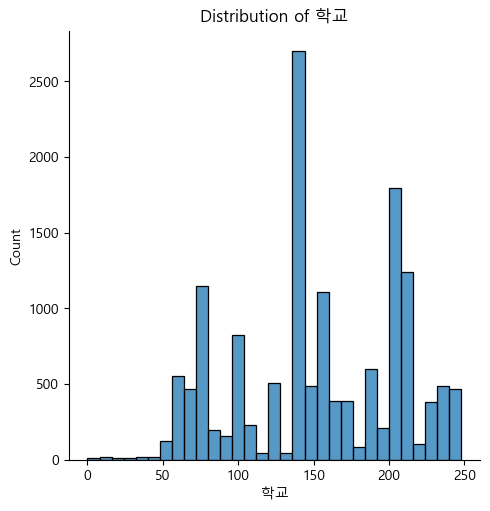

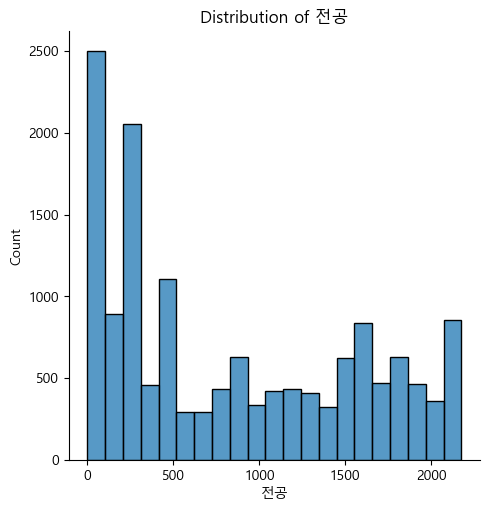

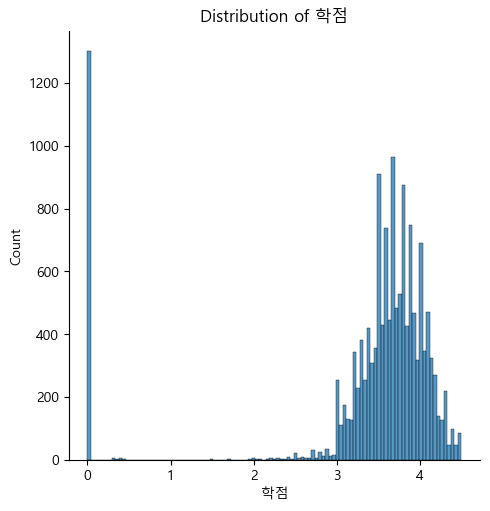

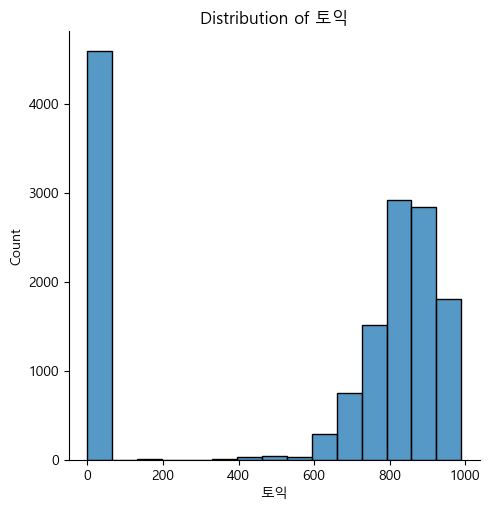

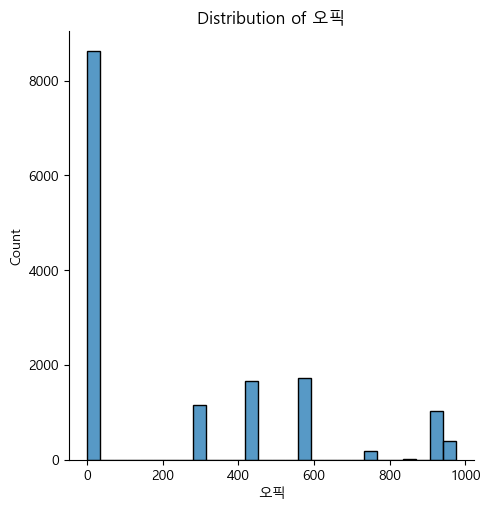

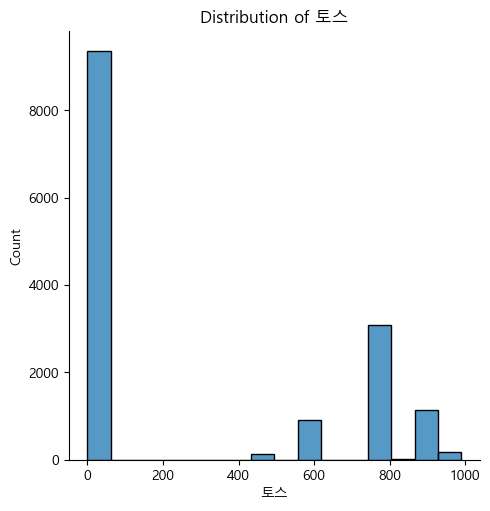

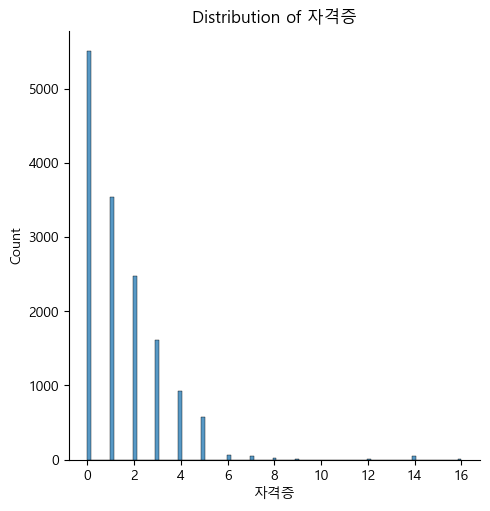

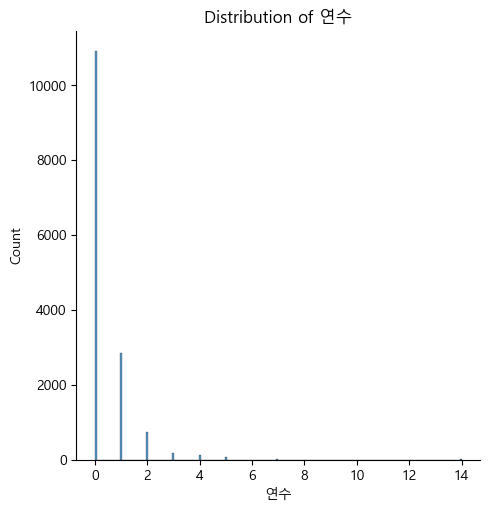

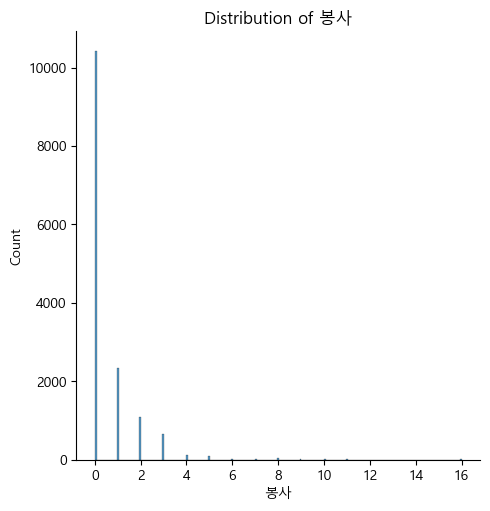

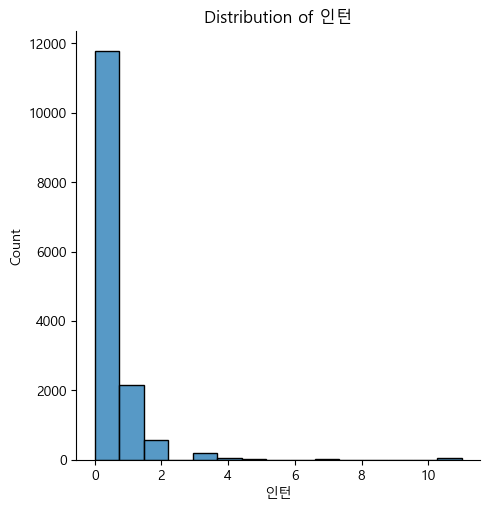

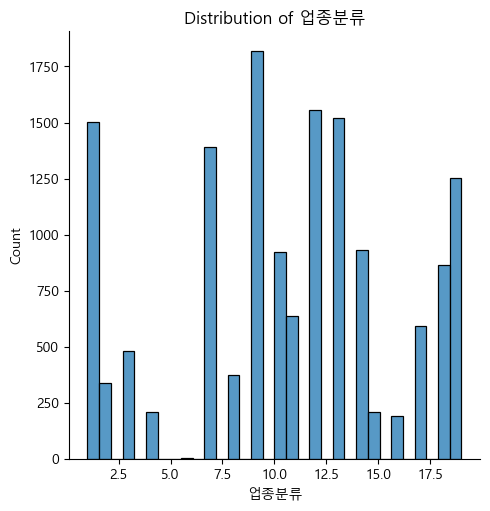

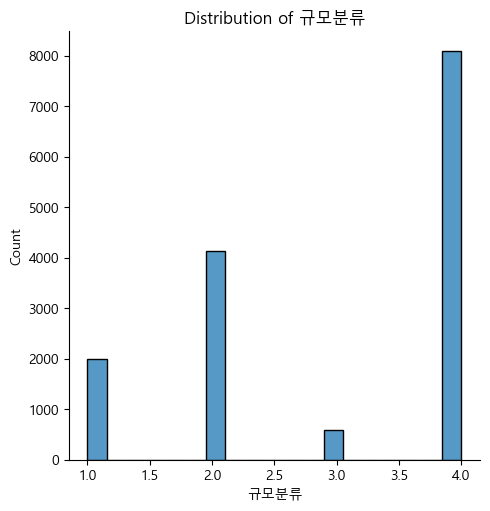

'\n학점에 0 > , 1 > 학점들이 존재 해당학점에 대해서는 이상치로 판단하여 데이터 삭제 \n토익은 어떻게 해야할지 모르겠습니다 0점으로 처리할지 아니면 중간값 or 평균으로 대체할지\n'

In [22]:
for column in df.columns:
    if df[column].dtype != 'object':
        sns.displot(df[column])
        plt.title(f'Distribution of {column}')
        plt.show()
        
# 학점을 보면 0값이 60개 이상인것을 알 수 있다. 학점을 입력하지 않은경우 (고졸이거나~)
# 또한 0이 아닌 소수점 값인 경우도 있는데, 이는 처리해야할 아웃라이어로 판단된다.

# 그외 해외연수, 인턴쉽, 수상경력등은 거의 0~1 근처에 분포해있으며, 일부 10회 이상이 기록되나 이상치로 보기는 힘듬
# 만일 머신러닝결과 학습이 잘 진행되지 않는다고 판단될 경우 추가적으로 제거. 현재는 문제 없을것으로 보임

# 영어점수의 경우 취합을 했음에도 0점에 분포해 있는 경우가 많음
# 이는 영어점수를 요구하는 기업이 아닐경우 영어점수를 따로 입력하지 않아 발생하는 문제로 판단됨
# 따라서 영어점수 0점은 중앙값으로 대체하는 식으로 이상치를 처리하고자 함

'''
학점에 0 > , 1 > 학점들이 존재 해당학점에 대해서는 이상치로 판단하여 데이터 삭제 
토익은 어떻게 해야할지 모르겠습니다 0점으로 처리할지 아니면 중간값 or 평균으로 대체할지
'''


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14810 entries, 0 to 14809
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     14810 non-null  object 
 1   지원분야    14810 non-null  object 
 2   학교      14810 non-null  int32  
 3   전공      14810 non-null  int32  
 4   학점      14810 non-null  float64
 5   토익      14810 non-null  int32  
 6   오픽      14810 non-null  int64  
 7   토스      14810 non-null  int64  
 8   자격증     14810 non-null  int32  
 9   연수      14810 non-null  int32  
 10  봉사      14810 non-null  int32  
 11  인턴      14810 non-null  int32  
 12  업종      14810 non-null  object 
 13  업종분류    14810 non-null  int64  
 14  기업규모    14810 non-null  object 
 15  규모분류    14810 non-null  int64  
dtypes: float64(1), int32(7), int64(4), object(4)
memory usage: 1.4+ MB


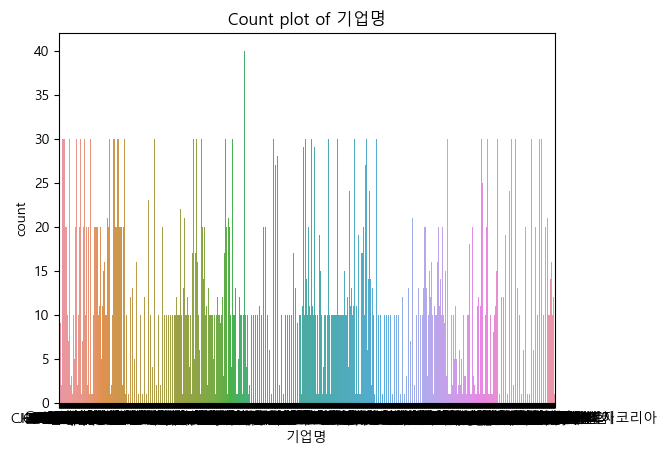

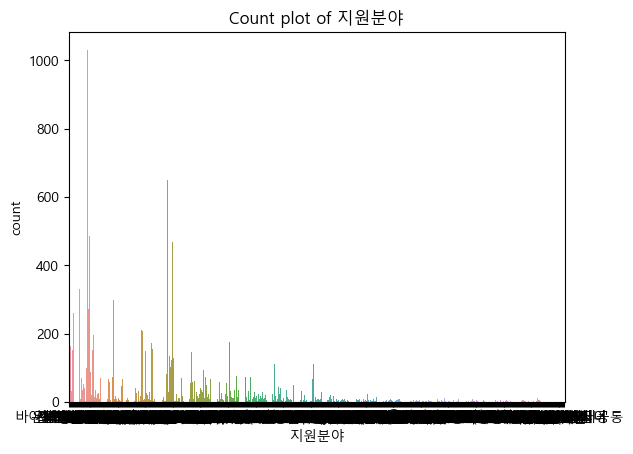

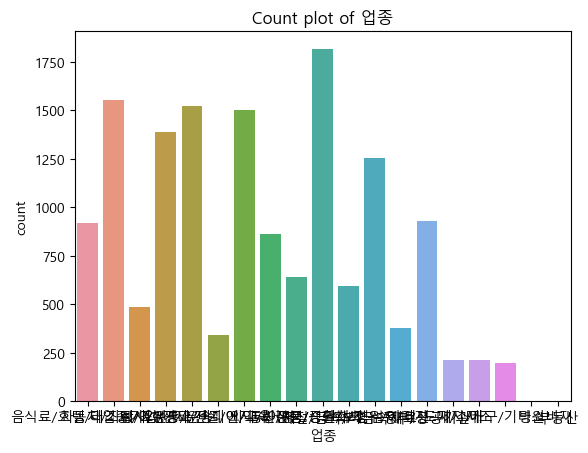

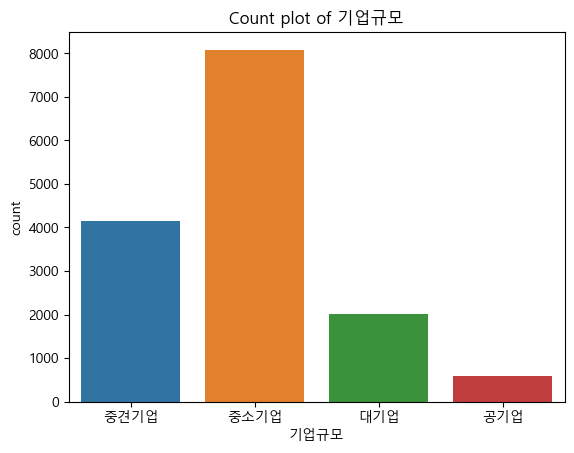

In [24]:
# 범주형 변수의 카운트 플롯
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
     sns.countplot(x=column, data=df)
     plt.title(f'Count plot of {column}')
     plt.show()

array([[<Axes: title={'center': '학교'}>, <Axes: title={'center': '전공'}>,
        <Axes: title={'center': '학점'}>],
       [<Axes: title={'center': '토익'}>, <Axes: title={'center': '오픽'}>,
        <Axes: title={'center': '토스'}>],
       [<Axes: title={'center': '자격증'}>, <Axes: title={'center': '연수'}>,
        <Axes: title={'center': '봉사'}>],
       [<Axes: title={'center': '인턴'}>, <Axes: title={'center': '업종분류'}>,
        <Axes: title={'center': '규모분류'}>]], dtype=object)

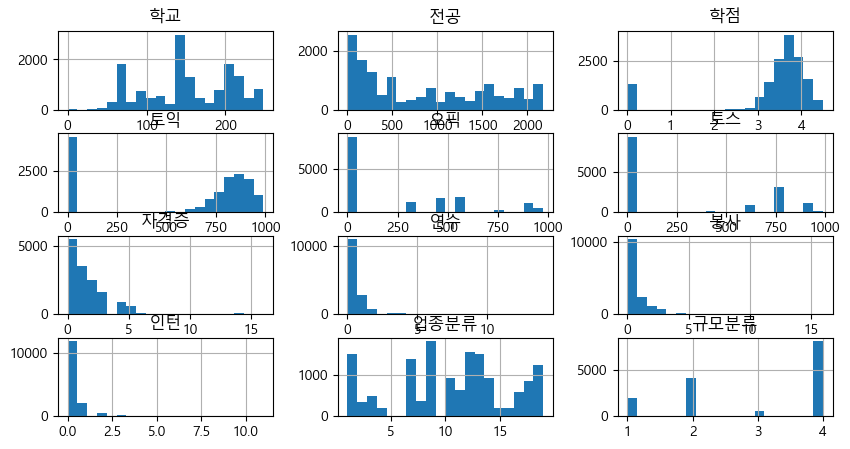

In [25]:
original_df = df
original_df.hist(bins=20, figsize=(10,5))

# 위 히스토그램 해석과 동일

#### 시각화 2 (박스 플롯)

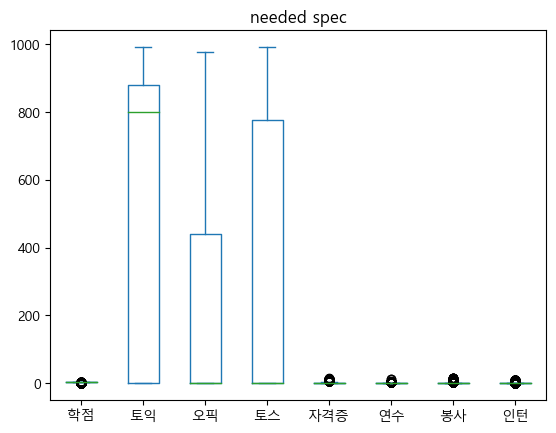

In [26]:
df.iloc[:,4:12].plot(kind = 'box');
plt.title ('needed spec')
plt.show();

# 박스플롯으로 출력한 결과 각각의 데이터 범주가 다르고
# 영어점수의 경우 특히 0~1000점 사이에 분포해 있기 때문에 식별을 위해선 minmaxscaler 등을 이용해 값 분포를 0~1사이에 일치시켜야 할 것으로 보임

# 단, 이때 labelencoder로 라벨링된 대학, 계열, 전공값은 정규화가 진행되지 않도록 주의!

#### 시각화 결과
- @ 데이터가 @한 부분이 이상해 처리가 필요하다. (처리해야하는 이유 설명)
- @ 데이터에서 아웃라이어가 많으나 이는 처리할 이상치가 아니라 판단된다.(처리해야하는 이유 설명)
- 따라서 @ 방법으로 처리하겠다.

#### ex) 학점 하위 25%가 3.4점인데 0점도 아니고 0.2~0.4점인 사람이 몇 있다
- 이상한게 맞는것 같으니 삭제 or 중앙값으로 대체하겠다.

#### ex) 봉사횟수 상위75%가 0회(1회)인데 11회인 사람이 있다
- 실제로 그런사람이 있을 수 있으니 오류값이 아니라 판단되어 그대로 두겠다
    - or 실제로 그렇다 하더라도 머신러닝에서 과적합/과소적합을 일으킬 요소로 보인다. 따라서 삭제한다.

#### 추가적인 데이터 EDA 진행

In [27]:
# 1. 학점 이상치 처리
df = df.drop(df.loc[df['학점'] < 1].index)
#df.loc[df['grade']<1,'grade'] = df['grade'].median()

In [28]:
# 토익 0점 데이터 변환
df.loc[df['토익']==0,'토익'] = df['토익'].median()
df.loc[df['오픽']==0,'오픽'] = df['오픽'].median()
df.loc[df['토스']==0,'토스'] = df['토스'].median()

In [29]:
# 2. 영어 이상치 처리
#df.loc[df['eng']<100,'eng'] = df['eng'].median()

array([[<Axes: title={'center': '학교'}>, <Axes: title={'center': '전공'}>,
        <Axes: title={'center': '학점'}>],
       [<Axes: title={'center': '토익'}>, <Axes: title={'center': '오픽'}>,
        <Axes: title={'center': '토스'}>],
       [<Axes: title={'center': '자격증'}>, <Axes: title={'center': '연수'}>,
        <Axes: title={'center': '봉사'}>],
       [<Axes: title={'center': '인턴'}>, <Axes: title={'center': '업종분류'}>,
        <Axes: title={'center': '규모분류'}>]], dtype=object)

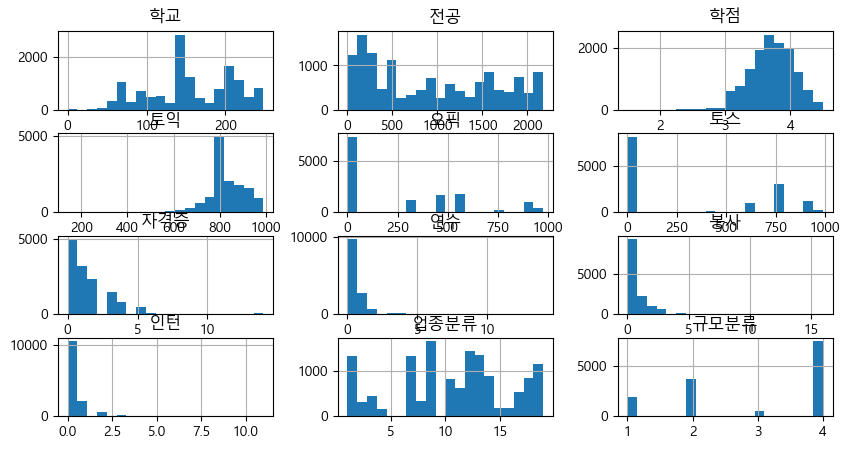

In [30]:
original_df = df
original_df.hist(bins=20, figsize=(10,5))

# 학점과 영어의 이상치가 성공적으로 사라진것을 확인할 수 있다.
# 단 영어점수를 하나로 통일할 때 토익스피킹과 오픽을 레벨에따라 특정값을 부여했더니
# 토익의 평탄화된 정규분포와 합쳐져 중간중간 삐죽삐죽 튀어나오는것을 확인할 수 있다.
# 분석해보고 값이 이상하다면 추가적인 평탄화 작업이 필요할 수 있다.

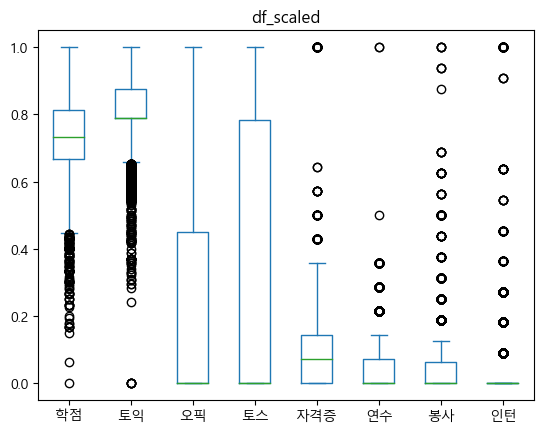

In [31]:
# 박스플롯으로 보기 위해 minmaxscaling을 진행한다.

from sklearn.preprocessing import MinMaxScaler
mms =  MinMaxScaler()
df_scaled  =  mms.fit_transform(df.iloc[:,4:12])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns =['학점' ,'토익','오픽','토스','자격증','연수','봉사','인턴']
df_scaled.plot(kind = 'box');
plt.title ('df_scaled')
plt.show();

# 진행 결과 아웃라이어가 굉장히 많은 것을 볼 수 있다 (아웃라이어 = 이상치 = 박스플롯 범위 바깥의 원들)
# 다만 히스토그램으로 확인해본 결과 값이 크게 이상하고 빈도수가 높은것은 아니라고 생각되므로 분석을 우선적으로 진행해보도록 하겠다.

#### 시각화 3 ([8]ML_로지스틱회귀 참고)

#### 시각화 4 상관관계 분석 (왜 해야하는지 파악하고 하셔야합니다!)

## 머신러닝 실행

Logistic Regression(다항로짓)	이경연
Decision Tree 김지희
Random Forest 이상영
Gradient Boosting Tree (GBT) 노시은
K-Nearest Neighbor (K-NN) 박용빈
Catboost 김태언

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
# step 2. 학습 데이터와 검증 데이터로 분리

X = df[['학교','전공','학점', '토익','오픽', '토스', '자격증', '연수', '봉사','인턴']]
y = df[['규모분류']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scores = {}


ctb_clf = CatBoostClassifier()
ctb_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(ctb_clf, X_test, y_test, cv = 5)
scores[('8.CatBoost', 'train_score')] = results.mean()
scores[('8.CatBoost', 'test_score')] = ctb_clf.score(X_test, y_test)

pd.Series(scores).unstack()

Learning rate set to 0.08904
0:	learn: 1.3354685	total: 150ms	remaining: 2m 30s
1:	learn: 1.2949073	total: 158ms	remaining: 1m 18s
2:	learn: 1.2612003	total: 167ms	remaining: 55.5s
3:	learn: 1.2335291	total: 174ms	remaining: 43.3s
4:	learn: 1.2105362	total: 180ms	remaining: 35.9s
5:	learn: 1.1890533	total: 186ms	remaining: 30.8s
6:	learn: 1.1707747	total: 190ms	remaining: 26.9s
7:	learn: 1.1555860	total: 194ms	remaining: 24.1s
8:	learn: 1.1428069	total: 198ms	remaining: 21.8s
9:	learn: 1.1320939	total: 203ms	remaining: 20.1s
10:	learn: 1.1218839	total: 208ms	remaining: 18.7s
11:	learn: 1.1136479	total: 212ms	remaining: 17.5s
12:	learn: 1.1053969	total: 217ms	remaining: 16.5s
13:	learn: 1.0994475	total: 225ms	remaining: 15.8s
14:	learn: 1.0922881	total: 229ms	remaining: 15.1s
15:	learn: 1.0880861	total: 231ms	remaining: 14.2s
16:	learn: 1.0837082	total: 235ms	remaining: 13.6s
17:	learn: 1.0796267	total: 239ms	remaining: 13s
18:	learn: 1.0757584	total: 243ms	remaining: 12.5s
19:	learn: 1

196:	learn: 0.9406875	total: 1s	remaining: 4.09s
197:	learn: 0.9400622	total: 1.01s	remaining: 4.08s
198:	learn: 0.9393588	total: 1.01s	remaining: 4.08s
199:	learn: 0.9387030	total: 1.02s	remaining: 4.08s
200:	learn: 0.9381442	total: 1.02s	remaining: 4.06s
201:	learn: 0.9377686	total: 1.03s	remaining: 4.05s
202:	learn: 0.9370136	total: 1.03s	remaining: 4.05s
203:	learn: 0.9364899	total: 1.03s	remaining: 4.04s
204:	learn: 0.9362936	total: 1.04s	remaining: 4.03s
205:	learn: 0.9359225	total: 1.04s	remaining: 4.02s
206:	learn: 0.9352828	total: 1.05s	remaining: 4.02s
207:	learn: 0.9347427	total: 1.05s	remaining: 4.01s
208:	learn: 0.9341846	total: 1.06s	remaining: 4s
209:	learn: 0.9335584	total: 1.06s	remaining: 4s
210:	learn: 0.9329012	total: 1.06s	remaining: 3.99s
211:	learn: 0.9323757	total: 1.07s	remaining: 3.98s
212:	learn: 0.9317303	total: 1.07s	remaining: 3.97s
213:	learn: 0.9312696	total: 1.08s	remaining: 3.96s
214:	learn: 0.9306628	total: 1.08s	remaining: 3.95s
215:	learn: 0.9302907

380:	learn: 0.8647211	total: 1.8s	remaining: 2.93s
381:	learn: 0.8642759	total: 1.81s	remaining: 2.93s
382:	learn: 0.8639286	total: 1.82s	remaining: 2.93s
383:	learn: 0.8637243	total: 1.82s	remaining: 2.92s
384:	learn: 0.8632983	total: 1.83s	remaining: 2.92s
385:	learn: 0.8630466	total: 1.83s	remaining: 2.91s
386:	learn: 0.8629090	total: 1.83s	remaining: 2.9s
387:	learn: 0.8627817	total: 1.84s	remaining: 2.9s
388:	learn: 0.8624500	total: 1.84s	remaining: 2.89s
389:	learn: 0.8622205	total: 1.85s	remaining: 2.89s
390:	learn: 0.8618180	total: 1.85s	remaining: 2.88s
391:	learn: 0.8616930	total: 1.86s	remaining: 2.88s
392:	learn: 0.8611120	total: 1.86s	remaining: 2.88s
393:	learn: 0.8608021	total: 1.87s	remaining: 2.87s
394:	learn: 0.8604099	total: 1.87s	remaining: 2.86s
395:	learn: 0.8602741	total: 1.88s	remaining: 2.86s
396:	learn: 0.8599404	total: 1.88s	remaining: 2.85s
397:	learn: 0.8595723	total: 1.88s	remaining: 2.85s
398:	learn: 0.8593408	total: 1.89s	remaining: 2.84s
399:	learn: 0.8

568:	learn: 0.8096576	total: 2.61s	remaining: 1.98s
569:	learn: 0.8094558	total: 2.62s	remaining: 1.97s
570:	learn: 0.8093851	total: 2.62s	remaining: 1.97s
571:	learn: 0.8091462	total: 2.62s	remaining: 1.96s
572:	learn: 0.8087915	total: 2.63s	remaining: 1.96s
573:	learn: 0.8086124	total: 2.63s	remaining: 1.95s
574:	learn: 0.8085040	total: 2.63s	remaining: 1.95s
575:	learn: 0.8083167	total: 2.64s	remaining: 1.94s
576:	learn: 0.8080474	total: 2.64s	remaining: 1.94s
577:	learn: 0.8077284	total: 2.65s	remaining: 1.93s
578:	learn: 0.8075482	total: 2.65s	remaining: 1.93s
579:	learn: 0.8073214	total: 2.66s	remaining: 1.92s
580:	learn: 0.8069984	total: 2.66s	remaining: 1.92s
581:	learn: 0.8067887	total: 2.66s	remaining: 1.91s
582:	learn: 0.8064806	total: 2.67s	remaining: 1.91s
583:	learn: 0.8062888	total: 2.67s	remaining: 1.9s
584:	learn: 0.8060356	total: 2.67s	remaining: 1.9s
585:	learn: 0.8055983	total: 2.68s	remaining: 1.89s
586:	learn: 0.8051201	total: 2.68s	remaining: 1.89s
587:	learn: 0.

763:	learn: 0.7633653	total: 3.44s	remaining: 1.06s
764:	learn: 0.7631915	total: 3.44s	remaining: 1.06s
765:	learn: 0.7630389	total: 3.44s	remaining: 1.05s
766:	learn: 0.7627459	total: 3.45s	remaining: 1.05s
767:	learn: 0.7624432	total: 3.45s	remaining: 1.04s
768:	learn: 0.7622968	total: 3.46s	remaining: 1.04s
769:	learn: 0.7621312	total: 3.46s	remaining: 1.03s
770:	learn: 0.7620209	total: 3.46s	remaining: 1.03s
771:	learn: 0.7617547	total: 3.47s	remaining: 1.02s
772:	learn: 0.7614733	total: 3.47s	remaining: 1.02s
773:	learn: 0.7611762	total: 3.48s	remaining: 1.01s
774:	learn: 0.7607952	total: 3.48s	remaining: 1.01s
775:	learn: 0.7605915	total: 3.48s	remaining: 1s
776:	learn: 0.7603792	total: 3.49s	remaining: 1s
777:	learn: 0.7601830	total: 3.49s	remaining: 996ms
778:	learn: 0.7599191	total: 3.49s	remaining: 991ms
779:	learn: 0.7597098	total: 3.5s	remaining: 987ms
780:	learn: 0.7596039	total: 3.5s	remaining: 982ms
781:	learn: 0.7592273	total: 3.5s	remaining: 977ms
782:	learn: 0.7590532

960:	learn: 0.7231545	total: 4.25s	remaining: 173ms
961:	learn: 0.7229538	total: 4.26s	remaining: 168ms
962:	learn: 0.7227770	total: 4.26s	remaining: 164ms
963:	learn: 0.7225199	total: 4.27s	remaining: 159ms
964:	learn: 0.7223914	total: 4.27s	remaining: 155ms
965:	learn: 0.7222232	total: 4.28s	remaining: 151ms
966:	learn: 0.7219626	total: 4.28s	remaining: 146ms
967:	learn: 0.7216667	total: 4.29s	remaining: 142ms
968:	learn: 0.7214309	total: 4.29s	remaining: 137ms
969:	learn: 0.7212248	total: 4.29s	remaining: 133ms
970:	learn: 0.7209355	total: 4.3s	remaining: 128ms
971:	learn: 0.7206897	total: 4.3s	remaining: 124ms
972:	learn: 0.7205568	total: 4.31s	remaining: 120ms
973:	learn: 0.7203339	total: 4.31s	remaining: 115ms
974:	learn: 0.7202392	total: 4.32s	remaining: 111ms
975:	learn: 0.7199829	total: 4.32s	remaining: 106ms
976:	learn: 0.7198617	total: 4.33s	remaining: 102ms
977:	learn: 0.7196305	total: 4.33s	remaining: 97.4ms
978:	learn: 0.7193805	total: 4.33s	remaining: 93ms
979:	learn: 0.

125:	learn: 0.9052736	total: 387ms	remaining: 2.68s
126:	learn: 0.9045902	total: 390ms	remaining: 2.68s
127:	learn: 0.9034980	total: 393ms	remaining: 2.67s
128:	learn: 0.9022872	total: 395ms	remaining: 2.67s
129:	learn: 0.9009023	total: 399ms	remaining: 2.67s
130:	learn: 0.8993388	total: 403ms	remaining: 2.67s
131:	learn: 0.8984190	total: 405ms	remaining: 2.67s
132:	learn: 0.8972614	total: 408ms	remaining: 2.66s
133:	learn: 0.8958582	total: 411ms	remaining: 2.66s
134:	learn: 0.8952835	total: 415ms	remaining: 2.66s
135:	learn: 0.8945617	total: 418ms	remaining: 2.65s
136:	learn: 0.8929247	total: 421ms	remaining: 2.65s
137:	learn: 0.8911600	total: 424ms	remaining: 2.65s
138:	learn: 0.8900951	total: 427ms	remaining: 2.64s
139:	learn: 0.8888426	total: 431ms	remaining: 2.65s
140:	learn: 0.8877081	total: 434ms	remaining: 2.64s
141:	learn: 0.8865290	total: 437ms	remaining: 2.64s
142:	learn: 0.8858161	total: 440ms	remaining: 2.63s
143:	learn: 0.8845040	total: 442ms	remaining: 2.63s
144:	learn: 

312:	learn: 0.7428362	total: 981ms	remaining: 2.15s
313:	learn: 0.7421262	total: 984ms	remaining: 2.15s
314:	learn: 0.7417153	total: 987ms	remaining: 2.15s
315:	learn: 0.7409951	total: 990ms	remaining: 2.14s
316:	learn: 0.7399773	total: 993ms	remaining: 2.14s
317:	learn: 0.7391913	total: 996ms	remaining: 2.14s
318:	learn: 0.7381737	total: 1s	remaining: 2.14s
319:	learn: 0.7374322	total: 1s	remaining: 2.13s
320:	learn: 0.7368654	total: 1.01s	remaining: 2.13s
321:	learn: 0.7357810	total: 1.01s	remaining: 2.13s
322:	learn: 0.7346978	total: 1.01s	remaining: 2.12s
323:	learn: 0.7343794	total: 1.02s	remaining: 2.12s
324:	learn: 0.7331310	total: 1.02s	remaining: 2.12s
325:	learn: 0.7321855	total: 1.02s	remaining: 2.11s
326:	learn: 0.7318031	total: 1.02s	remaining: 2.11s
327:	learn: 0.7311636	total: 1.03s	remaining: 2.1s
328:	learn: 0.7304440	total: 1.03s	remaining: 2.1s
329:	learn: 0.7296227	total: 1.03s	remaining: 2.1s
330:	learn: 0.7291106	total: 1.04s	remaining: 2.1s
331:	learn: 0.7282475	

519:	learn: 0.6226713	total: 1.6s	remaining: 1.48s
520:	learn: 0.6217421	total: 1.6s	remaining: 1.47s
521:	learn: 0.6214541	total: 1.61s	remaining: 1.47s
522:	learn: 0.6208522	total: 1.61s	remaining: 1.47s
523:	learn: 0.6203659	total: 1.61s	remaining: 1.47s
524:	learn: 0.6198162	total: 1.61s	remaining: 1.46s
525:	learn: 0.6191847	total: 1.62s	remaining: 1.46s
526:	learn: 0.6185573	total: 1.62s	remaining: 1.46s
527:	learn: 0.6181854	total: 1.63s	remaining: 1.45s
528:	learn: 0.6178311	total: 1.63s	remaining: 1.45s
529:	learn: 0.6174549	total: 1.63s	remaining: 1.45s
530:	learn: 0.6171082	total: 1.63s	remaining: 1.44s
531:	learn: 0.6164601	total: 1.64s	remaining: 1.44s
532:	learn: 0.6159279	total: 1.64s	remaining: 1.44s
533:	learn: 0.6152638	total: 1.64s	remaining: 1.43s
534:	learn: 0.6144458	total: 1.65s	remaining: 1.43s
535:	learn: 0.6143067	total: 1.65s	remaining: 1.43s
536:	learn: 0.6139291	total: 1.65s	remaining: 1.42s
537:	learn: 0.6138437	total: 1.65s	remaining: 1.42s
538:	learn: 0.

718:	learn: 0.5405462	total: 2.19s	remaining: 856ms
719:	learn: 0.5403579	total: 2.19s	remaining: 854ms
720:	learn: 0.5399565	total: 2.2s	remaining: 850ms
721:	learn: 0.5394328	total: 2.2s	remaining: 847ms
722:	learn: 0.5389864	total: 2.2s	remaining: 844ms
723:	learn: 0.5386143	total: 2.21s	remaining: 841ms
724:	learn: 0.5382058	total: 2.21s	remaining: 838ms
725:	learn: 0.5378783	total: 2.21s	remaining: 835ms
726:	learn: 0.5375499	total: 2.22s	remaining: 832ms
727:	learn: 0.5371052	total: 2.22s	remaining: 829ms
728:	learn: 0.5368186	total: 2.22s	remaining: 826ms
729:	learn: 0.5363585	total: 2.22s	remaining: 823ms
730:	learn: 0.5360115	total: 2.23s	remaining: 820ms
731:	learn: 0.5357464	total: 2.23s	remaining: 816ms
732:	learn: 0.5353815	total: 2.23s	remaining: 814ms
733:	learn: 0.5351320	total: 2.24s	remaining: 811ms
734:	learn: 0.5347391	total: 2.24s	remaining: 807ms
735:	learn: 0.5343551	total: 2.24s	remaining: 804ms
736:	learn: 0.5338101	total: 2.25s	remaining: 801ms
737:	learn: 0.5

910:	learn: 0.4773925	total: 2.78s	remaining: 272ms
911:	learn: 0.4772245	total: 2.79s	remaining: 269ms
912:	learn: 0.4769448	total: 2.79s	remaining: 266ms
913:	learn: 0.4767778	total: 2.79s	remaining: 263ms
914:	learn: 0.4765520	total: 2.8s	remaining: 260ms
915:	learn: 0.4764486	total: 2.8s	remaining: 257ms
916:	learn: 0.4761805	total: 2.8s	remaining: 254ms
917:	learn: 0.4758903	total: 2.81s	remaining: 251ms
918:	learn: 0.4757285	total: 2.81s	remaining: 248ms
919:	learn: 0.4755482	total: 2.81s	remaining: 245ms
920:	learn: 0.4752532	total: 2.81s	remaining: 241ms
921:	learn: 0.4751578	total: 2.82s	remaining: 238ms
922:	learn: 0.4749462	total: 2.82s	remaining: 235ms
923:	learn: 0.4747154	total: 2.82s	remaining: 232ms
924:	learn: 0.4745193	total: 2.83s	remaining: 229ms
925:	learn: 0.4742337	total: 2.83s	remaining: 226ms
926:	learn: 0.4741102	total: 2.83s	remaining: 223ms
927:	learn: 0.4739860	total: 2.83s	remaining: 220ms
928:	learn: 0.4734495	total: 2.84s	remaining: 217ms
929:	learn: 0.4

98:	learn: 0.9460092	total: 298ms	remaining: 2.71s
99:	learn: 0.9447812	total: 302ms	remaining: 2.72s
100:	learn: 0.9434771	total: 305ms	remaining: 2.72s
101:	learn: 0.9425284	total: 309ms	remaining: 2.72s
102:	learn: 0.9414699	total: 312ms	remaining: 2.72s
103:	learn: 0.9402229	total: 315ms	remaining: 2.71s
104:	learn: 0.9391453	total: 319ms	remaining: 2.72s
105:	learn: 0.9378654	total: 322ms	remaining: 2.71s
106:	learn: 0.9366962	total: 325ms	remaining: 2.71s
107:	learn: 0.9353261	total: 328ms	remaining: 2.71s
108:	learn: 0.9344808	total: 330ms	remaining: 2.7s
109:	learn: 0.9333760	total: 335ms	remaining: 2.71s
110:	learn: 0.9309814	total: 337ms	remaining: 2.7s
111:	learn: 0.9299211	total: 340ms	remaining: 2.69s
112:	learn: 0.9281462	total: 343ms	remaining: 2.69s
113:	learn: 0.9270770	total: 345ms	remaining: 2.68s
114:	learn: 0.9257816	total: 350ms	remaining: 2.69s
115:	learn: 0.9249835	total: 352ms	remaining: 2.68s
116:	learn: 0.9242780	total: 355ms	remaining: 2.68s
117:	learn: 0.92

287:	learn: 0.7612044	total: 902ms	remaining: 2.23s
288:	learn: 0.7604912	total: 906ms	remaining: 2.23s
289:	learn: 0.7590613	total: 909ms	remaining: 2.23s
290:	learn: 0.7582856	total: 912ms	remaining: 2.22s
291:	learn: 0.7576784	total: 916ms	remaining: 2.22s
292:	learn: 0.7569080	total: 919ms	remaining: 2.22s
293:	learn: 0.7564486	total: 921ms	remaining: 2.21s
294:	learn: 0.7555177	total: 924ms	remaining: 2.21s
295:	learn: 0.7550385	total: 928ms	remaining: 2.21s
296:	learn: 0.7542323	total: 931ms	remaining: 2.2s
297:	learn: 0.7539493	total: 934ms	remaining: 2.2s
298:	learn: 0.7533939	total: 937ms	remaining: 2.19s
299:	learn: 0.7526194	total: 939ms	remaining: 2.19s
300:	learn: 0.7518456	total: 942ms	remaining: 2.19s
301:	learn: 0.7516970	total: 945ms	remaining: 2.18s
302:	learn: 0.7511019	total: 948ms	remaining: 2.18s
303:	learn: 0.7505356	total: 951ms	remaining: 2.18s
304:	learn: 0.7495874	total: 953ms	remaining: 2.17s
305:	learn: 0.7490125	total: 956ms	remaining: 2.17s
306:	learn: 0.

483:	learn: 0.6405563	total: 1.49s	remaining: 1.59s
484:	learn: 0.6397984	total: 1.5s	remaining: 1.59s
485:	learn: 0.6393410	total: 1.5s	remaining: 1.59s
486:	learn: 0.6388168	total: 1.51s	remaining: 1.59s
487:	learn: 0.6382563	total: 1.51s	remaining: 1.58s
488:	learn: 0.6376933	total: 1.51s	remaining: 1.58s
489:	learn: 0.6367486	total: 1.51s	remaining: 1.58s
490:	learn: 0.6363624	total: 1.52s	remaining: 1.57s
491:	learn: 0.6358044	total: 1.52s	remaining: 1.57s
492:	learn: 0.6352741	total: 1.52s	remaining: 1.57s
493:	learn: 0.6347539	total: 1.53s	remaining: 1.56s
494:	learn: 0.6344515	total: 1.53s	remaining: 1.56s
495:	learn: 0.6340216	total: 1.53s	remaining: 1.56s
496:	learn: 0.6334523	total: 1.54s	remaining: 1.55s
497:	learn: 0.6328620	total: 1.54s	remaining: 1.55s
498:	learn: 0.6326439	total: 1.54s	remaining: 1.55s
499:	learn: 0.6321526	total: 1.54s	remaining: 1.54s
500:	learn: 0.6313428	total: 1.55s	remaining: 1.54s
501:	learn: 0.6310432	total: 1.55s	remaining: 1.54s
502:	learn: 0.

673:	learn: 0.5575473	total: 2.1s	remaining: 1.01s
674:	learn: 0.5573054	total: 2.1s	remaining: 1.01s
675:	learn: 0.5572016	total: 2.11s	remaining: 1.01s
676:	learn: 0.5568788	total: 2.11s	remaining: 1.01s
677:	learn: 0.5562370	total: 2.11s	remaining: 1s
678:	learn: 0.5559492	total: 2.12s	remaining: 1s
679:	learn: 0.5555291	total: 2.12s	remaining: 997ms
680:	learn: 0.5551366	total: 2.12s	remaining: 994ms
681:	learn: 0.5549617	total: 2.12s	remaining: 991ms
682:	learn: 0.5547192	total: 2.13s	remaining: 987ms
683:	learn: 0.5543628	total: 2.13s	remaining: 985ms
684:	learn: 0.5539138	total: 2.13s	remaining: 982ms
685:	learn: 0.5531993	total: 2.14s	remaining: 978ms
686:	learn: 0.5530482	total: 2.14s	remaining: 975ms
687:	learn: 0.5526262	total: 2.14s	remaining: 972ms
688:	learn: 0.5521296	total: 2.15s	remaining: 969ms
689:	learn: 0.5518740	total: 2.15s	remaining: 966ms
690:	learn: 0.5513600	total: 2.15s	remaining: 963ms
691:	learn: 0.5508228	total: 2.16s	remaining: 960ms
692:	learn: 0.550635

864:	learn: 0.4951454	total: 2.69s	remaining: 419ms
865:	learn: 0.4949583	total: 2.69s	remaining: 416ms
866:	learn: 0.4944744	total: 2.69s	remaining: 413ms
867:	learn: 0.4942288	total: 2.7s	remaining: 410ms
868:	learn: 0.4939138	total: 2.7s	remaining: 408ms
869:	learn: 0.4938142	total: 2.71s	remaining: 404ms
870:	learn: 0.4932620	total: 2.71s	remaining: 401ms
871:	learn: 0.4930226	total: 2.71s	remaining: 398ms
872:	learn: 0.4927021	total: 2.71s	remaining: 395ms
873:	learn: 0.4923148	total: 2.72s	remaining: 392ms
874:	learn: 0.4918426	total: 2.72s	remaining: 389ms
875:	learn: 0.4913262	total: 2.73s	remaining: 386ms
876:	learn: 0.4912785	total: 2.73s	remaining: 383ms
877:	learn: 0.4909822	total: 2.73s	remaining: 379ms
878:	learn: 0.4905882	total: 2.73s	remaining: 377ms
879:	learn: 0.4902234	total: 2.74s	remaining: 373ms
880:	learn: 0.4899406	total: 2.74s	remaining: 370ms
881:	learn: 0.4897246	total: 2.74s	remaining: 367ms
882:	learn: 0.4895193	total: 2.75s	remaining: 364ms
883:	learn: 0.

32:	learn: 1.0481911	total: 104ms	remaining: 3.05s
33:	learn: 1.0470379	total: 107ms	remaining: 3.04s
34:	learn: 1.0446401	total: 113ms	remaining: 3.11s
35:	learn: 1.0418837	total: 116ms	remaining: 3.11s
36:	learn: 1.0408806	total: 119ms	remaining: 3.09s
37:	learn: 1.0386945	total: 121ms	remaining: 3.08s
38:	learn: 1.0369522	total: 124ms	remaining: 3.06s
39:	learn: 1.0351535	total: 128ms	remaining: 3.08s
40:	learn: 1.0327641	total: 131ms	remaining: 3.06s
41:	learn: 1.0310313	total: 134ms	remaining: 3.05s
42:	learn: 1.0284214	total: 137ms	remaining: 3.04s
43:	learn: 1.0267469	total: 140ms	remaining: 3.03s
44:	learn: 1.0251042	total: 143ms	remaining: 3.04s
45:	learn: 1.0234822	total: 146ms	remaining: 3.03s
46:	learn: 1.0219808	total: 149ms	remaining: 3.02s
47:	learn: 1.0207924	total: 152ms	remaining: 3.01s
48:	learn: 1.0180255	total: 155ms	remaining: 3s
49:	learn: 1.0172476	total: 158ms	remaining: 3.01s
50:	learn: 1.0160042	total: 161ms	remaining: 3s
51:	learn: 1.0139107	total: 164ms	rem

226:	learn: 0.8160211	total: 709ms	remaining: 2.42s
227:	learn: 0.8155129	total: 713ms	remaining: 2.41s
228:	learn: 0.8148177	total: 716ms	remaining: 2.41s
229:	learn: 0.8135691	total: 719ms	remaining: 2.4s
230:	learn: 0.8118743	total: 722ms	remaining: 2.4s
231:	learn: 0.8106712	total: 726ms	remaining: 2.4s
232:	learn: 0.8100631	total: 729ms	remaining: 2.4s
233:	learn: 0.8094133	total: 731ms	remaining: 2.39s
234:	learn: 0.8082318	total: 735ms	remaining: 2.39s
235:	learn: 0.8077170	total: 737ms	remaining: 2.39s
236:	learn: 0.8070008	total: 742ms	remaining: 2.39s
237:	learn: 0.8060620	total: 745ms	remaining: 2.38s
238:	learn: 0.8058676	total: 748ms	remaining: 2.38s
239:	learn: 0.8051095	total: 751ms	remaining: 2.38s
240:	learn: 0.8047728	total: 754ms	remaining: 2.37s
241:	learn: 0.8039609	total: 758ms	remaining: 2.37s
242:	learn: 0.8033662	total: 760ms	remaining: 2.37s
243:	learn: 0.8026198	total: 763ms	remaining: 2.36s
244:	learn: 0.8015889	total: 766ms	remaining: 2.36s
245:	learn: 0.80

414:	learn: 0.6816672	total: 1.28s	remaining: 1.81s
415:	learn: 0.6808350	total: 1.29s	remaining: 1.81s
416:	learn: 0.6802178	total: 1.29s	remaining: 1.81s
417:	learn: 0.6797942	total: 1.3s	remaining: 1.8s
418:	learn: 0.6791214	total: 1.3s	remaining: 1.8s
419:	learn: 0.6783198	total: 1.3s	remaining: 1.8s
420:	learn: 0.6777558	total: 1.3s	remaining: 1.79s
421:	learn: 0.6770904	total: 1.31s	remaining: 1.79s
422:	learn: 0.6765205	total: 1.31s	remaining: 1.79s
423:	learn: 0.6760932	total: 1.31s	remaining: 1.79s
424:	learn: 0.6757058	total: 1.32s	remaining: 1.78s
425:	learn: 0.6752870	total: 1.32s	remaining: 1.78s
426:	learn: 0.6749277	total: 1.32s	remaining: 1.78s
427:	learn: 0.6747319	total: 1.33s	remaining: 1.77s
428:	learn: 0.6741665	total: 1.33s	remaining: 1.77s
429:	learn: 0.6740041	total: 1.33s	remaining: 1.77s
430:	learn: 0.6736197	total: 1.34s	remaining: 1.76s
431:	learn: 0.6727538	total: 1.34s	remaining: 1.76s
432:	learn: 0.6722619	total: 1.34s	remaining: 1.76s
433:	learn: 0.67179

603:	learn: 0.5867685	total: 1.88s	remaining: 1.23s
604:	learn: 0.5859899	total: 1.88s	remaining: 1.23s
605:	learn: 0.5857450	total: 1.89s	remaining: 1.23s
606:	learn: 0.5853470	total: 1.89s	remaining: 1.22s
607:	learn: 0.5848730	total: 1.89s	remaining: 1.22s
608:	learn: 0.5845332	total: 1.9s	remaining: 1.22s
609:	learn: 0.5842504	total: 1.9s	remaining: 1.21s
610:	learn: 0.5838337	total: 1.9s	remaining: 1.21s
611:	learn: 0.5833983	total: 1.91s	remaining: 1.21s
612:	learn: 0.5832325	total: 1.91s	remaining: 1.21s
613:	learn: 0.5830099	total: 1.91s	remaining: 1.2s
614:	learn: 0.5823298	total: 1.92s	remaining: 1.2s
615:	learn: 0.5820649	total: 1.92s	remaining: 1.2s
616:	learn: 0.5813231	total: 1.92s	remaining: 1.19s
617:	learn: 0.5807472	total: 1.93s	remaining: 1.19s
618:	learn: 0.5803338	total: 1.93s	remaining: 1.19s
619:	learn: 0.5801035	total: 1.93s	remaining: 1.18s
620:	learn: 0.5796359	total: 1.93s	remaining: 1.18s
621:	learn: 0.5790262	total: 1.94s	remaining: 1.18s
622:	learn: 0.5783

801:	learn: 0.5121994	total: 2.48s	remaining: 613ms
802:	learn: 0.5120462	total: 2.49s	remaining: 610ms
803:	learn: 0.5117323	total: 2.49s	remaining: 607ms
804:	learn: 0.5112375	total: 2.49s	remaining: 604ms
805:	learn: 0.5107241	total: 2.5s	remaining: 601ms
806:	learn: 0.5103829	total: 2.5s	remaining: 598ms
807:	learn: 0.5100884	total: 2.5s	remaining: 594ms
808:	learn: 0.5098533	total: 2.5s	remaining: 591ms
809:	learn: 0.5094461	total: 2.51s	remaining: 588ms
810:	learn: 0.5089216	total: 2.51s	remaining: 585ms
811:	learn: 0.5085717	total: 2.51s	remaining: 582ms
812:	learn: 0.5083575	total: 2.52s	remaining: 579ms
813:	learn: 0.5081725	total: 2.52s	remaining: 576ms
814:	learn: 0.5079393	total: 2.52s	remaining: 573ms
815:	learn: 0.5076301	total: 2.53s	remaining: 570ms
816:	learn: 0.5070233	total: 2.53s	remaining: 567ms
817:	learn: 0.5069165	total: 2.53s	remaining: 563ms
818:	learn: 0.5066522	total: 2.54s	remaining: 560ms
819:	learn: 0.5064255	total: 2.54s	remaining: 557ms
820:	learn: 0.50

Learning rate set to 0.083237
0:	learn: 1.3419089	total: 3.6ms	remaining: 3.6s
1:	learn: 1.3065010	total: 7.2ms	remaining: 3.6s
2:	learn: 1.2759533	total: 11.7ms	remaining: 3.88s
3:	learn: 1.2498492	total: 14.8ms	remaining: 3.68s
4:	learn: 1.2276833	total: 17.8ms	remaining: 3.54s
5:	learn: 1.2080699	total: 20.8ms	remaining: 3.45s
6:	learn: 1.1908647	total: 24ms	remaining: 3.41s
7:	learn: 1.1760936	total: 26.8ms	remaining: 3.32s
8:	learn: 1.1618274	total: 29.6ms	remaining: 3.26s
9:	learn: 1.1505591	total: 32.4ms	remaining: 3.2s
10:	learn: 1.1406397	total: 35.5ms	remaining: 3.19s
11:	learn: 1.1304494	total: 38.7ms	remaining: 3.19s
12:	learn: 1.1209004	total: 41.7ms	remaining: 3.17s
13:	learn: 1.1135169	total: 46.5ms	remaining: 3.27s
14:	learn: 1.1059370	total: 49.9ms	remaining: 3.27s
15:	learn: 1.0996604	total: 52.5ms	remaining: 3.23s
16:	learn: 1.0945218	total: 55.1ms	remaining: 3.19s
17:	learn: 1.0889803	total: 58ms	remaining: 3.17s
18:	learn: 1.0847741	total: 60.6ms	remaining: 3.13s
1

185:	learn: 0.8524194	total: 591ms	remaining: 2.58s
186:	learn: 0.8516087	total: 594ms	remaining: 2.58s
187:	learn: 0.8506419	total: 600ms	remaining: 2.59s
188:	learn: 0.8501446	total: 604ms	remaining: 2.59s
189:	learn: 0.8490397	total: 607ms	remaining: 2.59s
190:	learn: 0.8483860	total: 609ms	remaining: 2.58s
191:	learn: 0.8477868	total: 614ms	remaining: 2.58s
192:	learn: 0.8468503	total: 617ms	remaining: 2.58s
193:	learn: 0.8459991	total: 620ms	remaining: 2.58s
194:	learn: 0.8448393	total: 623ms	remaining: 2.57s
195:	learn: 0.8436224	total: 626ms	remaining: 2.57s
196:	learn: 0.8427843	total: 630ms	remaining: 2.57s
197:	learn: 0.8412114	total: 633ms	remaining: 2.56s
198:	learn: 0.8407111	total: 636ms	remaining: 2.56s
199:	learn: 0.8403420	total: 638ms	remaining: 2.55s
200:	learn: 0.8389762	total: 641ms	remaining: 2.55s
201:	learn: 0.8371867	total: 646ms	remaining: 2.55s
202:	learn: 0.8360455	total: 649ms	remaining: 2.55s
203:	learn: 0.8354742	total: 652ms	remaining: 2.54s
204:	learn: 

381:	learn: 0.7021350	total: 1.2s	remaining: 1.94s
382:	learn: 0.7012683	total: 1.2s	remaining: 1.93s
383:	learn: 0.7006822	total: 1.21s	remaining: 1.93s
384:	learn: 0.6999410	total: 1.21s	remaining: 1.93s
385:	learn: 0.6991644	total: 1.21s	remaining: 1.93s
386:	learn: 0.6981324	total: 1.22s	remaining: 1.92s
387:	learn: 0.6978774	total: 1.22s	remaining: 1.92s
388:	learn: 0.6972762	total: 1.22s	remaining: 1.92s
389:	learn: 0.6968037	total: 1.22s	remaining: 1.91s
390:	learn: 0.6964866	total: 1.23s	remaining: 1.91s
391:	learn: 0.6955409	total: 1.23s	remaining: 1.91s
392:	learn: 0.6951155	total: 1.23s	remaining: 1.9s
393:	learn: 0.6943290	total: 1.23s	remaining: 1.9s
394:	learn: 0.6936233	total: 1.24s	remaining: 1.9s
395:	learn: 0.6930198	total: 1.24s	remaining: 1.89s
396:	learn: 0.6923331	total: 1.25s	remaining: 1.89s
397:	learn: 0.6915719	total: 1.25s	remaining: 1.89s
398:	learn: 0.6911912	total: 1.25s	remaining: 1.89s
399:	learn: 0.6903188	total: 1.25s	remaining: 1.88s
400:	learn: 0.690

563:	learn: 0.6072271	total: 1.78s	remaining: 1.37s
564:	learn: 0.6067363	total: 1.78s	remaining: 1.37s
565:	learn: 0.6065562	total: 1.79s	remaining: 1.37s
566:	learn: 0.6063203	total: 1.79s	remaining: 1.37s
567:	learn: 0.6061161	total: 1.79s	remaining: 1.36s
568:	learn: 0.6056908	total: 1.8s	remaining: 1.36s
569:	learn: 0.6050199	total: 1.8s	remaining: 1.36s
570:	learn: 0.6041245	total: 1.8s	remaining: 1.36s
571:	learn: 0.6039112	total: 1.81s	remaining: 1.35s
572:	learn: 0.6036034	total: 1.81s	remaining: 1.35s
573:	learn: 0.6028747	total: 1.82s	remaining: 1.35s
574:	learn: 0.6024420	total: 1.82s	remaining: 1.34s
575:	learn: 0.6018172	total: 1.82s	remaining: 1.34s
576:	learn: 0.6015110	total: 1.83s	remaining: 1.34s
577:	learn: 0.6010773	total: 1.83s	remaining: 1.34s
578:	learn: 0.6008225	total: 1.83s	remaining: 1.33s
579:	learn: 0.6000118	total: 1.84s	remaining: 1.33s
580:	learn: 0.5996143	total: 1.84s	remaining: 1.33s
581:	learn: 0.5990438	total: 1.84s	remaining: 1.32s
582:	learn: 0.5

748:	learn: 0.5306638	total: 2.39s	remaining: 801ms
749:	learn: 0.5303610	total: 2.39s	remaining: 797ms
750:	learn: 0.5302839	total: 2.4s	remaining: 794ms
751:	learn: 0.5298250	total: 2.4s	remaining: 792ms
752:	learn: 0.5294408	total: 2.4s	remaining: 788ms
753:	learn: 0.5292157	total: 2.41s	remaining: 785ms
754:	learn: 0.5290112	total: 2.41s	remaining: 782ms
755:	learn: 0.5287976	total: 2.41s	remaining: 778ms
756:	learn: 0.5285407	total: 2.41s	remaining: 775ms
757:	learn: 0.5283781	total: 2.42s	remaining: 772ms
758:	learn: 0.5281026	total: 2.42s	remaining: 769ms
759:	learn: 0.5278980	total: 2.42s	remaining: 765ms
760:	learn: 0.5275955	total: 2.42s	remaining: 762ms
761:	learn: 0.5273541	total: 2.43s	remaining: 758ms
762:	learn: 0.5270828	total: 2.43s	remaining: 755ms
763:	learn: 0.5268373	total: 2.43s	remaining: 752ms
764:	learn: 0.5265646	total: 2.44s	remaining: 749ms
765:	learn: 0.5262361	total: 2.44s	remaining: 746ms
766:	learn: 0.5258561	total: 2.44s	remaining: 743ms
767:	learn: 0.5

937:	learn: 0.4728765	total: 2.98s	remaining: 197ms
938:	learn: 0.4726637	total: 2.98s	remaining: 194ms
939:	learn: 0.4721488	total: 2.98s	remaining: 191ms
940:	learn: 0.4719723	total: 2.99s	remaining: 187ms
941:	learn: 0.4717629	total: 2.99s	remaining: 184ms
942:	learn: 0.4715936	total: 3s	remaining: 181ms
943:	learn: 0.4714141	total: 3s	remaining: 178ms
944:	learn: 0.4712380	total: 3s	remaining: 175ms
945:	learn: 0.4710333	total: 3s	remaining: 171ms
946:	learn: 0.4707900	total: 3.01s	remaining: 168ms
947:	learn: 0.4705431	total: 3.01s	remaining: 165ms
948:	learn: 0.4701191	total: 3.01s	remaining: 162ms
949:	learn: 0.4698687	total: 3.02s	remaining: 159ms
950:	learn: 0.4693571	total: 3.02s	remaining: 156ms
951:	learn: 0.4689910	total: 3.02s	remaining: 152ms
952:	learn: 0.4687865	total: 3.02s	remaining: 149ms
953:	learn: 0.4685232	total: 3.03s	remaining: 146ms
954:	learn: 0.4682876	total: 3.03s	remaining: 143ms
955:	learn: 0.4680064	total: 3.03s	remaining: 140ms
956:	learn: 0.4677460	to

113:	learn: 0.9301252	total: 360ms	remaining: 2.8s
114:	learn: 0.9280249	total: 365ms	remaining: 2.81s
115:	learn: 0.9269427	total: 368ms	remaining: 2.81s
116:	learn: 0.9258369	total: 371ms	remaining: 2.8s
117:	learn: 0.9238132	total: 374ms	remaining: 2.8s
118:	learn: 0.9222234	total: 377ms	remaining: 2.79s
119:	learn: 0.9215720	total: 381ms	remaining: 2.79s
120:	learn: 0.9206893	total: 384ms	remaining: 2.79s
121:	learn: 0.9202444	total: 387ms	remaining: 2.78s
122:	learn: 0.9183970	total: 390ms	remaining: 2.78s
123:	learn: 0.9164769	total: 392ms	remaining: 2.77s
124:	learn: 0.9149173	total: 396ms	remaining: 2.77s
125:	learn: 0.9139919	total: 399ms	remaining: 2.76s
126:	learn: 0.9127941	total: 401ms	remaining: 2.76s
127:	learn: 0.9114173	total: 404ms	remaining: 2.75s
128:	learn: 0.9106499	total: 407ms	remaining: 2.75s
129:	learn: 0.9097269	total: 410ms	remaining: 2.74s
130:	learn: 0.9090024	total: 414ms	remaining: 2.74s
131:	learn: 0.9086426	total: 416ms	remaining: 2.74s
132:	learn: 0.9

304:	learn: 0.7493773	total: 969ms	remaining: 2.21s
305:	learn: 0.7485381	total: 972ms	remaining: 2.21s
306:	learn: 0.7476933	total: 976ms	remaining: 2.2s
307:	learn: 0.7469111	total: 980ms	remaining: 2.2s
308:	learn: 0.7463389	total: 983ms	remaining: 2.2s
309:	learn: 0.7453612	total: 986ms	remaining: 2.19s
310:	learn: 0.7447025	total: 990ms	remaining: 2.19s
311:	learn: 0.7443191	total: 993ms	remaining: 2.19s
312:	learn: 0.7438521	total: 998ms	remaining: 2.19s
313:	learn: 0.7432905	total: 1s	remaining: 2.19s
314:	learn: 0.7426345	total: 1s	remaining: 2.18s
315:	learn: 0.7421875	total: 1.01s	remaining: 2.18s
316:	learn: 0.7407569	total: 1.01s	remaining: 2.18s
317:	learn: 0.7399316	total: 1.01s	remaining: 2.18s
318:	learn: 0.7393047	total: 1.02s	remaining: 2.17s
319:	learn: 0.7390312	total: 1.02s	remaining: 2.17s
320:	learn: 0.7387360	total: 1.02s	remaining: 2.17s
321:	learn: 0.7382695	total: 1.03s	remaining: 2.17s
322:	learn: 0.7379855	total: 1.03s	remaining: 2.16s
323:	learn: 0.7371250

495:	learn: 0.6358687	total: 1.58s	remaining: 1.6s
496:	learn: 0.6356536	total: 1.58s	remaining: 1.6s
497:	learn: 0.6352063	total: 1.58s	remaining: 1.6s
498:	learn: 0.6350099	total: 1.59s	remaining: 1.59s
499:	learn: 0.6345313	total: 1.59s	remaining: 1.59s
500:	learn: 0.6341546	total: 1.59s	remaining: 1.59s
501:	learn: 0.6335049	total: 1.6s	remaining: 1.58s
502:	learn: 0.6331463	total: 1.6s	remaining: 1.58s
503:	learn: 0.6326809	total: 1.6s	remaining: 1.58s
504:	learn: 0.6322106	total: 1.61s	remaining: 1.57s
505:	learn: 0.6314190	total: 1.61s	remaining: 1.57s
506:	learn: 0.6312018	total: 1.61s	remaining: 1.57s
507:	learn: 0.6307843	total: 1.61s	remaining: 1.56s
508:	learn: 0.6301185	total: 1.62s	remaining: 1.56s
509:	learn: 0.6293047	total: 1.62s	remaining: 1.56s
510:	learn: 0.6284189	total: 1.62s	remaining: 1.55s
511:	learn: 0.6283393	total: 1.63s	remaining: 1.55s
512:	learn: 0.6278649	total: 1.63s	remaining: 1.55s
513:	learn: 0.6272852	total: 1.63s	remaining: 1.54s
514:	learn: 0.6261

681:	learn: 0.5553831	total: 2.17s	remaining: 1.01s
682:	learn: 0.5551151	total: 2.18s	remaining: 1.01s
683:	learn: 0.5547194	total: 2.18s	remaining: 1.01s
684:	learn: 0.5543649	total: 2.18s	remaining: 1s
685:	learn: 0.5541372	total: 2.19s	remaining: 1s
686:	learn: 0.5536347	total: 2.19s	remaining: 997ms
687:	learn: 0.5533326	total: 2.19s	remaining: 994ms
688:	learn: 0.5530926	total: 2.19s	remaining: 991ms
689:	learn: 0.5524645	total: 2.2s	remaining: 987ms
690:	learn: 0.5521574	total: 2.2s	remaining: 984ms
691:	learn: 0.5517675	total: 2.2s	remaining: 981ms
692:	learn: 0.5512963	total: 2.21s	remaining: 977ms
693:	learn: 0.5510552	total: 2.21s	remaining: 974ms
694:	learn: 0.5505971	total: 2.21s	remaining: 971ms
695:	learn: 0.5503676	total: 2.21s	remaining: 967ms
696:	learn: 0.5502263	total: 2.22s	remaining: 964ms
697:	learn: 0.5499184	total: 2.22s	remaining: 961ms
698:	learn: 0.5496279	total: 2.22s	remaining: 957ms
699:	learn: 0.5494209	total: 2.23s	remaining: 954ms
700:	learn: 0.5489846

867:	learn: 0.4948130	total: 2.76s	remaining: 420ms
868:	learn: 0.4941513	total: 2.77s	remaining: 417ms
869:	learn: 0.4940785	total: 2.77s	remaining: 414ms
870:	learn: 0.4939400	total: 2.78s	remaining: 411ms
871:	learn: 0.4938078	total: 2.78s	remaining: 408ms
872:	learn: 0.4936698	total: 2.78s	remaining: 405ms
873:	learn: 0.4932515	total: 2.79s	remaining: 402ms
874:	learn: 0.4930567	total: 2.79s	remaining: 399ms
875:	learn: 0.4929041	total: 2.79s	remaining: 396ms
876:	learn: 0.4925051	total: 2.8s	remaining: 392ms
877:	learn: 0.4920405	total: 2.8s	remaining: 390ms
878:	learn: 0.4915556	total: 2.81s	remaining: 386ms
879:	learn: 0.4912987	total: 2.81s	remaining: 383ms
880:	learn: 0.4911411	total: 2.81s	remaining: 380ms
881:	learn: 0.4909048	total: 2.82s	remaining: 377ms
882:	learn: 0.4905173	total: 2.82s	remaining: 374ms
883:	learn: 0.4901136	total: 2.82s	remaining: 371ms
884:	learn: 0.4897315	total: 2.83s	remaining: 367ms
885:	learn: 0.4896083	total: 2.83s	remaining: 364ms
886:	learn: 0.

,test_score,train_score
8.CatBoost,0.533195,0.505335


#### 세부 파라미터 조절 (GridSearchCV, RandomSearchCV)를 통해 수치 조절
- 또한 가능하다면, GridSearchCV, RandomSearchCV를 둘다 사용하고 둘중 무엇을 사용하는게 나은지도 설명
        - GridSearchCV는 모든 경우의 수를 고려하여 정확도는 높으나 실행 속도가 느림
        - RandomSearchCV는 일부만 뽑아 실행하여 실행속도가 빠름
        
        
        - ex) 우리가 나중에 목표로 하는건 많은 사람에게 빠른속도로 서비스를 제공하는 것이므로 Random쪽이 적합하다
        - ex) 우리가 최종적으로는 교육과정또한 추천하여 사람들이 적게는 1개월 많게는 6개월 이상의 시간을 투자하게 될텐데 오래걸려도 정확도가 높은쪽이 낫다고 판단된다.

In [33]:
# 탐색할 하이퍼파라미터 조합 정의
param_dist = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8 , 10],
    'learning_rate': [0.01, 0.05, 0.03],
    'l2_leaf_reg': [1, 3, 5 ,7]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(estimator=ctb_clf, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# 무작위 탐색을 수행하여 최적의 하이퍼파라미터 조합 찾기
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", random_search.best_params_)

# 최적의 모델로 평가
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f'Accuracy with Best Model: {accuracy:.2f}')

0:	learn: 1.3804907	total: 4.94ms	remaining: 489ms
1:	learn: 1.3759535	total: 49.1ms	remaining: 2.4s
2:	learn: 1.3713461	total: 90.5ms	remaining: 2.92s
3:	learn: 1.3662664	total: 130ms	remaining: 3.13s
4:	learn: 1.3608793	total: 132ms	remaining: 2.52s
5:	learn: 1.3556076	total: 134ms	remaining: 2.1s
6:	learn: 1.3510179	total: 177ms	remaining: 2.35s
7:	learn: 1.3459440	total: 183ms	remaining: 2.11s
8:	learn: 1.3415180	total: 232ms	remaining: 2.35s
9:	learn: 1.3372169	total: 275ms	remaining: 2.48s
10:	learn: 1.3327850	total: 327ms	remaining: 2.65s
11:	learn: 1.3288194	total: 369ms	remaining: 2.7s
12:	learn: 1.3251111	total: 416ms	remaining: 2.78s
13:	learn: 1.3211217	total: 461ms	remaining: 2.83s
14:	learn: 1.3171217	total: 515ms	remaining: 2.92s
15:	learn: 1.3129271	total: 560ms	remaining: 2.94s
16:	learn: 1.3087552	total: 605ms	remaining: 2.95s
17:	learn: 1.3045343	total: 609ms	remaining: 2.77s
18:	learn: 1.3002827	total: 615ms	remaining: 2.62s
19:	learn: 1.2973570	total: 660ms	remaini

66:	learn: 1.1771020	total: 2.62s	remaining: 1.29s
67:	learn: 1.1754215	total: 2.67s	remaining: 1.25s
68:	learn: 1.1736762	total: 2.71s	remaining: 1.22s
69:	learn: 1.1721652	total: 2.75s	remaining: 1.18s
70:	learn: 1.1705267	total: 2.8s	remaining: 1.14s
71:	learn: 1.1686838	total: 2.8s	remaining: 1.09s
72:	learn: 1.1671772	total: 2.84s	remaining: 1.05s
73:	learn: 1.1655930	total: 2.88s	remaining: 1.01s
74:	learn: 1.1639170	total: 2.92s	remaining: 975ms
75:	learn: 1.1622452	total: 2.96s	remaining: 936ms
76:	learn: 1.1606038	total: 3.01s	remaining: 898ms
77:	learn: 1.1590782	total: 3.05s	remaining: 860ms
78:	learn: 1.1575319	total: 3.1s	remaining: 823ms
79:	learn: 1.1560419	total: 3.14s	remaining: 785ms
80:	learn: 1.1544863	total: 3.19s	remaining: 747ms
81:	learn: 1.1529730	total: 3.23s	remaining: 709ms
82:	learn: 1.1514846	total: 3.27s	remaining: 670ms
83:	learn: 1.1499775	total: 3.31s	remaining: 631ms
84:	learn: 1.1485573	total: 3.36s	remaining: 593ms
85:	learn: 1.1470468	total: 3.41s	

89:	learn: 1.0451593	total: 199ms	remaining: 243ms
90:	learn: 1.0448023	total: 201ms	remaining: 241ms
91:	learn: 1.0444619	total: 204ms	remaining: 239ms
92:	learn: 1.0443187	total: 205ms	remaining: 236ms
93:	learn: 1.0440797	total: 207ms	remaining: 234ms
94:	learn: 1.0437647	total: 209ms	remaining: 231ms
95:	learn: 1.0434195	total: 213ms	remaining: 231ms
96:	learn: 1.0430304	total: 216ms	remaining: 229ms
97:	learn: 1.0427419	total: 218ms	remaining: 227ms
98:	learn: 1.0421009	total: 220ms	remaining: 225ms
99:	learn: 1.0417102	total: 222ms	remaining: 222ms
100:	learn: 1.0411704	total: 224ms	remaining: 219ms
101:	learn: 1.0408612	total: 227ms	remaining: 218ms
102:	learn: 1.0407141	total: 229ms	remaining: 216ms
103:	learn: 1.0406408	total: 231ms	remaining: 214ms
104:	learn: 1.0404333	total: 233ms	remaining: 211ms
105:	learn: 1.0402726	total: 235ms	remaining: 208ms
106:	learn: 1.0398377	total: 237ms	remaining: 206ms
107:	learn: 1.0394940	total: 239ms	remaining: 203ms
108:	learn: 1.0392926	t

54:	learn: 1.0616390	total: 119ms	remaining: 314ms
55:	learn: 1.0612392	total: 121ms	remaining: 312ms
56:	learn: 1.0607704	total: 124ms	remaining: 311ms
57:	learn: 1.0601761	total: 127ms	remaining: 310ms
58:	learn: 1.0595197	total: 131ms	remaining: 312ms
59:	learn: 1.0588213	total: 133ms	remaining: 309ms
60:	learn: 1.0582750	total: 135ms	remaining: 308ms
61:	learn: 1.0579145	total: 137ms	remaining: 305ms
62:	learn: 1.0575108	total: 139ms	remaining: 302ms
63:	learn: 1.0572151	total: 140ms	remaining: 298ms
64:	learn: 1.0567637	total: 142ms	remaining: 296ms
65:	learn: 1.0560139	total: 144ms	remaining: 293ms
66:	learn: 1.0556858	total: 147ms	remaining: 291ms
67:	learn: 1.0553976	total: 149ms	remaining: 289ms
68:	learn: 1.0552274	total: 151ms	remaining: 287ms
69:	learn: 1.0549148	total: 153ms	remaining: 283ms
70:	learn: 1.0545651	total: 155ms	remaining: 281ms
71:	learn: 1.0542417	total: 157ms	remaining: 279ms
72:	learn: 1.0536107	total: 159ms	remaining: 277ms
73:	learn: 1.0530627	total: 162

13:	learn: 1.1658158	total: 34.7ms	remaining: 461ms
14:	learn: 1.1585207	total: 37.5ms	remaining: 462ms
15:	learn: 1.1512130	total: 39.3ms	remaining: 452ms
16:	learn: 1.1446026	total: 41.3ms	remaining: 445ms
17:	learn: 1.1382611	total: 45.7ms	remaining: 462ms
18:	learn: 1.1328282	total: 47.8ms	remaining: 455ms
19:	learn: 1.1270594	total: 49.8ms	remaining: 448ms
20:	learn: 1.1226759	total: 52.1ms	remaining: 444ms
21:	learn: 1.1179393	total: 54.6ms	remaining: 441ms
22:	learn: 1.1136151	total: 56.6ms	remaining: 435ms
23:	learn: 1.1098038	total: 60.8ms	remaining: 446ms
24:	learn: 1.1060249	total: 64.3ms	remaining: 450ms
25:	learn: 1.1025299	total: 66.2ms	remaining: 443ms
26:	learn: 1.0989824	total: 69ms	remaining: 442ms
27:	learn: 1.0957458	total: 71.5ms	remaining: 439ms
28:	learn: 1.0929488	total: 73.6ms	remaining: 434ms
29:	learn: 1.0900276	total: 75.5ms	remaining: 428ms
30:	learn: 1.0878166	total: 78.8ms	remaining: 429ms
31:	learn: 1.0858308	total: 81.4ms	remaining: 427ms
32:	learn: 1.0

193:	learn: 1.0181541	total: 435ms	remaining: 13.5ms
194:	learn: 1.0178834	total: 437ms	remaining: 11.2ms
195:	learn: 1.0177484	total: 439ms	remaining: 8.96ms
196:	learn: 1.0176722	total: 442ms	remaining: 6.73ms
197:	learn: 1.0174956	total: 444ms	remaining: 4.48ms
198:	learn: 1.0173700	total: 446ms	remaining: 2.24ms
199:	learn: 1.0173105	total: 449ms	remaining: 0us
0:	learn: 1.3578461	total: 4.41ms	remaining: 437ms
1:	learn: 1.3349002	total: 19.8ms	remaining: 970ms
2:	learn: 1.3120186	total: 38.2ms	remaining: 1.24s
3:	learn: 1.2916861	total: 52.3ms	remaining: 1.25s
4:	learn: 1.2736818	total: 67.9ms	remaining: 1.29s
5:	learn: 1.2561021	total: 73.3ms	remaining: 1.15s
6:	learn: 1.2409915	total: 87.4ms	remaining: 1.16s
7:	learn: 1.2262943	total: 102ms	remaining: 1.17s
8:	learn: 1.2135557	total: 115ms	remaining: 1.17s
9:	learn: 1.2016192	total: 130ms	remaining: 1.17s
10:	learn: 1.1914987	total: 146ms	remaining: 1.18s
11:	learn: 1.1814529	total: 161ms	remaining: 1.18s
12:	learn: 1.1719170	to

55:	learn: 1.0348722	total: 771ms	remaining: 606ms
56:	learn: 1.0340199	total: 783ms	remaining: 591ms
57:	learn: 1.0328055	total: 795ms	remaining: 576ms
58:	learn: 1.0314183	total: 810ms	remaining: 563ms
59:	learn: 1.0304402	total: 822ms	remaining: 548ms
60:	learn: 1.0298475	total: 833ms	remaining: 533ms
61:	learn: 1.0288175	total: 848ms	remaining: 519ms
62:	learn: 1.0272205	total: 859ms	remaining: 505ms
63:	learn: 1.0264278	total: 872ms	remaining: 491ms
64:	learn: 1.0252753	total: 884ms	remaining: 476ms
65:	learn: 1.0243058	total: 897ms	remaining: 462ms
66:	learn: 1.0229166	total: 911ms	remaining: 449ms
67:	learn: 1.0215686	total: 924ms	remaining: 435ms
68:	learn: 1.0202832	total: 938ms	remaining: 421ms
69:	learn: 1.0195225	total: 952ms	remaining: 408ms
70:	learn: 1.0184676	total: 967ms	remaining: 395ms
71:	learn: 1.0171806	total: 981ms	remaining: 381ms
72:	learn: 1.0159759	total: 994ms	remaining: 368ms
73:	learn: 1.0153936	total: 1.01s	remaining: 354ms
74:	learn: 1.0138791	total: 1.0

21:	learn: 1.0945243	total: 301ms	remaining: 3.8s
22:	learn: 1.0878128	total: 314ms	remaining: 3.78s
23:	learn: 1.0817486	total: 327ms	remaining: 3.76s
24:	learn: 1.0776020	total: 340ms	remaining: 3.73s
25:	learn: 1.0736088	total: 353ms	remaining: 3.72s
26:	learn: 1.0705199	total: 366ms	remaining: 3.7s
27:	learn: 1.0663756	total: 378ms	remaining: 3.67s
28:	learn: 1.0636258	total: 391ms	remaining: 3.65s
29:	learn: 1.0596389	total: 404ms	remaining: 3.64s
30:	learn: 1.0568591	total: 420ms	remaining: 3.64s
31:	learn: 1.0534200	total: 433ms	remaining: 3.63s
32:	learn: 1.0507063	total: 448ms	remaining: 3.63s
33:	learn: 1.0467816	total: 463ms	remaining: 3.62s
34:	learn: 1.0439397	total: 476ms	remaining: 3.6s
35:	learn: 1.0405641	total: 489ms	remaining: 3.58s
36:	learn: 1.0373357	total: 503ms	remaining: 3.58s
37:	learn: 1.0358249	total: 517ms	remaining: 3.56s
38:	learn: 1.0329208	total: 532ms	remaining: 3.56s
39:	learn: 1.0294075	total: 545ms	remaining: 3.54s
40:	learn: 1.0270475	total: 559ms	

195:	learn: 0.8363883	total: 2.63s	remaining: 1.4s
196:	learn: 0.8348062	total: 2.65s	remaining: 1.39s
197:	learn: 0.8338983	total: 2.67s	remaining: 1.38s
198:	learn: 0.8325108	total: 2.68s	remaining: 1.36s
199:	learn: 0.8316660	total: 2.7s	remaining: 1.35s
200:	learn: 0.8311281	total: 2.71s	remaining: 1.33s
201:	learn: 0.8294544	total: 2.73s	remaining: 1.32s
202:	learn: 0.8281849	total: 2.74s	remaining: 1.31s
203:	learn: 0.8265494	total: 2.75s	remaining: 1.3s
204:	learn: 0.8258370	total: 2.77s	remaining: 1.28s
205:	learn: 0.8243774	total: 2.78s	remaining: 1.27s
206:	learn: 0.8236849	total: 2.8s	remaining: 1.26s
207:	learn: 0.8226456	total: 2.81s	remaining: 1.24s
208:	learn: 0.8218490	total: 2.82s	remaining: 1.23s
209:	learn: 0.8209745	total: 2.84s	remaining: 1.22s
210:	learn: 0.8202185	total: 2.85s	remaining: 1.2s
211:	learn: 0.8193146	total: 2.87s	remaining: 1.19s
212:	learn: 0.8187458	total: 2.88s	remaining: 1.18s
213:	learn: 0.8174883	total: 2.89s	remaining: 1.16s
214:	learn: 0.816

57:	learn: 0.9960864	total: 698ms	remaining: 2.91s
58:	learn: 0.9941454	total: 711ms	remaining: 2.9s
59:	learn: 0.9925524	total: 723ms	remaining: 2.89s
60:	learn: 0.9911330	total: 736ms	remaining: 2.88s
61:	learn: 0.9897835	total: 748ms	remaining: 2.87s
62:	learn: 0.9871486	total: 760ms	remaining: 2.86s
63:	learn: 0.9861042	total: 772ms	remaining: 2.85s
64:	learn: 0.9845396	total: 786ms	remaining: 2.84s
65:	learn: 0.9835145	total: 798ms	remaining: 2.83s
66:	learn: 0.9812187	total: 810ms	remaining: 2.82s
67:	learn: 0.9790771	total: 824ms	remaining: 2.81s
68:	learn: 0.9767933	total: 837ms	remaining: 2.8s
69:	learn: 0.9766678	total: 838ms	remaining: 2.75s
70:	learn: 0.9739176	total: 851ms	remaining: 2.74s
71:	learn: 0.9728509	total: 864ms	remaining: 2.73s
72:	learn: 0.9716012	total: 876ms	remaining: 2.72s
73:	learn: 0.9694834	total: 888ms	remaining: 2.71s
74:	learn: 0.9673568	total: 901ms	remaining: 2.7s
75:	learn: 0.9661449	total: 915ms	remaining: 2.69s
76:	learn: 0.9644783	total: 927ms	

226:	learn: 0.8146136	total: 2.83s	remaining: 909ms
227:	learn: 0.8139861	total: 2.84s	remaining: 897ms
228:	learn: 0.8128352	total: 2.85s	remaining: 885ms
229:	learn: 0.8121881	total: 2.87s	remaining: 873ms
230:	learn: 0.8120063	total: 2.89s	remaining: 864ms
231:	learn: 0.8107956	total: 2.91s	remaining: 852ms
232:	learn: 0.8100640	total: 2.92s	remaining: 839ms
233:	learn: 0.8094947	total: 2.93s	remaining: 826ms
234:	learn: 0.8088139	total: 2.94s	remaining: 813ms
235:	learn: 0.8082768	total: 2.95s	remaining: 801ms
236:	learn: 0.8074084	total: 2.97s	remaining: 789ms
237:	learn: 0.8066432	total: 2.98s	remaining: 776ms
238:	learn: 0.8058842	total: 2.99s	remaining: 764ms
239:	learn: 0.8044756	total: 3s	remaining: 751ms
240:	learn: 0.8036310	total: 3.02s	remaining: 739ms
241:	learn: 0.8031009	total: 3.03s	remaining: 727ms
242:	learn: 0.8020841	total: 3.05s	remaining: 715ms
243:	learn: 0.8011149	total: 3.06s	remaining: 703ms
244:	learn: 0.8003132	total: 3.08s	remaining: 690ms
245:	learn: 0.7

92:	learn: 0.9500002	total: 1.27s	remaining: 2.84s
93:	learn: 0.9493030	total: 1.29s	remaining: 2.83s
94:	learn: 0.9481049	total: 1.3s	remaining: 2.81s
95:	learn: 0.9474674	total: 1.32s	remaining: 2.8s
96:	learn: 0.9467881	total: 1.33s	remaining: 2.78s
97:	learn: 0.9458482	total: 1.34s	remaining: 2.77s
98:	learn: 0.9453510	total: 1.36s	remaining: 2.75s
99:	learn: 0.9451162	total: 1.36s	remaining: 2.72s
100:	learn: 0.9442320	total: 1.37s	remaining: 2.71s
101:	learn: 0.9437480	total: 1.39s	remaining: 2.69s
102:	learn: 0.9432113	total: 1.4s	remaining: 2.68s
103:	learn: 0.9419811	total: 1.41s	remaining: 2.67s
104:	learn: 0.9411647	total: 1.43s	remaining: 2.65s
105:	learn: 0.9409011	total: 1.44s	remaining: 2.64s
106:	learn: 0.9393538	total: 1.46s	remaining: 2.63s
107:	learn: 0.9386166	total: 1.47s	remaining: 2.62s
108:	learn: 0.9380413	total: 1.49s	remaining: 2.6s
109:	learn: 0.9373354	total: 1.5s	remaining: 2.6s
110:	learn: 0.9363503	total: 1.51s	remaining: 2.58s
111:	learn: 0.9355784	tota

255:	learn: 0.8006909	total: 3.4s	remaining: 584ms
256:	learn: 0.8001390	total: 3.41s	remaining: 571ms
257:	learn: 0.7993556	total: 3.42s	remaining: 558ms
258:	learn: 0.7986885	total: 3.44s	remaining: 544ms
259:	learn: 0.7983453	total: 3.45s	remaining: 531ms
260:	learn: 0.7978972	total: 3.46s	remaining: 517ms
261:	learn: 0.7972800	total: 3.47s	remaining: 504ms
262:	learn: 0.7961622	total: 3.49s	remaining: 490ms
263:	learn: 0.7954480	total: 3.5s	remaining: 477ms
264:	learn: 0.7947978	total: 3.51s	remaining: 464ms
265:	learn: 0.7938566	total: 3.52s	remaining: 450ms
266:	learn: 0.7927550	total: 3.54s	remaining: 437ms
267:	learn: 0.7919725	total: 3.55s	remaining: 424ms
268:	learn: 0.7908432	total: 3.56s	remaining: 410ms
269:	learn: 0.7900719	total: 3.57s	remaining: 397ms
270:	learn: 0.7895126	total: 3.59s	remaining: 384ms
271:	learn: 0.7890760	total: 3.6s	remaining: 370ms
272:	learn: 0.7882094	total: 3.61s	remaining: 357ms
273:	learn: 0.7869027	total: 3.63s	remaining: 344ms
274:	learn: 0.7

163:	learn: 1.0187043	total: 621ms	remaining: 136ms
164:	learn: 1.0184033	total: 627ms	remaining: 133ms
165:	learn: 1.0181248	total: 631ms	remaining: 129ms
166:	learn: 1.0176565	total: 636ms	remaining: 126ms
167:	learn: 1.0174056	total: 640ms	remaining: 122ms
168:	learn: 1.0170995	total: 643ms	remaining: 118ms
169:	learn: 1.0169400	total: 649ms	remaining: 115ms
170:	learn: 1.0166537	total: 652ms	remaining: 111ms
171:	learn: 1.0163849	total: 656ms	remaining: 107ms
172:	learn: 1.0160198	total: 660ms	remaining: 103ms
173:	learn: 1.0157472	total: 663ms	remaining: 99.1ms
174:	learn: 1.0155397	total: 666ms	remaining: 95.2ms
175:	learn: 1.0152874	total: 670ms	remaining: 91.3ms
176:	learn: 1.0151000	total: 673ms	remaining: 87.4ms
177:	learn: 1.0150108	total: 676ms	remaining: 83.6ms
178:	learn: 1.0149557	total: 680ms	remaining: 79.8ms
179:	learn: 1.0144866	total: 686ms	remaining: 76.2ms
180:	learn: 1.0142478	total: 689ms	remaining: 72.4ms
181:	learn: 1.0139708	total: 693ms	remaining: 68.5ms
182

163:	learn: 1.0227073	total: 625ms	remaining: 137ms
164:	learn: 1.0224955	total: 629ms	remaining: 133ms
165:	learn: 1.0222770	total: 633ms	remaining: 130ms
166:	learn: 1.0219700	total: 637ms	remaining: 126ms
167:	learn: 1.0217488	total: 642ms	remaining: 122ms
168:	learn: 1.0215723	total: 645ms	remaining: 118ms
169:	learn: 1.0214012	total: 648ms	remaining: 114ms
170:	learn: 1.0210080	total: 657ms	remaining: 111ms
171:	learn: 1.0207554	total: 661ms	remaining: 108ms
172:	learn: 1.0201769	total: 664ms	remaining: 104ms
173:	learn: 1.0198536	total: 668ms	remaining: 99.8ms
174:	learn: 1.0196195	total: 671ms	remaining: 95.8ms
175:	learn: 1.0193941	total: 674ms	remaining: 92ms
176:	learn: 1.0192948	total: 678ms	remaining: 88.1ms
177:	learn: 1.0191497	total: 681ms	remaining: 84.2ms
178:	learn: 1.0188256	total: 685ms	remaining: 80.4ms
179:	learn: 1.0184754	total: 688ms	remaining: 76.5ms
180:	learn: 1.0182318	total: 694ms	remaining: 72.8ms
181:	learn: 1.0179311	total: 697ms	remaining: 69ms
182:	le

169:	learn: 1.0134412	total: 633ms	remaining: 112ms
170:	learn: 1.0129975	total: 637ms	remaining: 108ms
171:	learn: 1.0125179	total: 642ms	remaining: 104ms
172:	learn: 1.0120192	total: 645ms	remaining: 101ms
173:	learn: 1.0118833	total: 649ms	remaining: 96.9ms
174:	learn: 1.0117819	total: 656ms	remaining: 93.7ms
175:	learn: 1.0113810	total: 659ms	remaining: 89.9ms
176:	learn: 1.0112325	total: 664ms	remaining: 86.2ms
177:	learn: 1.0109388	total: 667ms	remaining: 82.5ms
178:	learn: 1.0105244	total: 671ms	remaining: 78.7ms
179:	learn: 1.0102328	total: 674ms	remaining: 74.9ms
180:	learn: 1.0100753	total: 678ms	remaining: 71.1ms
181:	learn: 1.0097729	total: 684ms	remaining: 67.6ms
182:	learn: 1.0094138	total: 687ms	remaining: 63.9ms
183:	learn: 1.0091257	total: 691ms	remaining: 60.1ms
184:	learn: 1.0088880	total: 694ms	remaining: 56.3ms
185:	learn: 1.0085447	total: 698ms	remaining: 52.5ms
186:	learn: 1.0083278	total: 701ms	remaining: 48.8ms
187:	learn: 1.0081808	total: 705ms	remaining: 45ms

190:	learn: 1.0729851	total: 449ms	remaining: 21.2ms
191:	learn: 1.0727110	total: 454ms	remaining: 18.9ms
192:	learn: 1.0724019	total: 456ms	remaining: 16.5ms
193:	learn: 1.0720936	total: 460ms	remaining: 14.2ms
194:	learn: 1.0718489	total: 462ms	remaining: 11.9ms
195:	learn: 1.0715667	total: 465ms	remaining: 9.49ms
196:	learn: 1.0712528	total: 468ms	remaining: 7.12ms
197:	learn: 1.0709269	total: 471ms	remaining: 4.75ms
198:	learn: 1.0705866	total: 473ms	remaining: 2.38ms
199:	learn: 1.0702724	total: 476ms	remaining: 0us
0:	learn: 1.3803922	total: 2.33ms	remaining: 464ms
1:	learn: 1.3746001	total: 5.77ms	remaining: 571ms
2:	learn: 1.3689290	total: 8.07ms	remaining: 530ms
3:	learn: 1.3634360	total: 10.3ms	remaining: 507ms
4:	learn: 1.3581123	total: 12.8ms	remaining: 498ms
5:	learn: 1.3527766	total: 15.4ms	remaining: 499ms
6:	learn: 1.3477083	total: 17.6ms	remaining: 485ms
7:	learn: 1.3427010	total: 19.9ms	remaining: 477ms
8:	learn: 1.3378456	total: 21.9ms	remaining: 464ms
9:	learn: 1.33

161:	learn: 1.0870485	total: 333ms	remaining: 78.1ms
162:	learn: 1.0866533	total: 336ms	remaining: 76.2ms
163:	learn: 1.0863129	total: 338ms	remaining: 74.1ms
164:	learn: 1.0859004	total: 340ms	remaining: 72ms
165:	learn: 1.0855674	total: 342ms	remaining: 70ms
166:	learn: 1.0851992	total: 344ms	remaining: 67.9ms
167:	learn: 1.0847941	total: 345ms	remaining: 65.8ms
168:	learn: 1.0844418	total: 348ms	remaining: 63.8ms
169:	learn: 1.0840694	total: 351ms	remaining: 61.9ms
170:	learn: 1.0837140	total: 354ms	remaining: 60ms
171:	learn: 1.0832632	total: 356ms	remaining: 57.9ms
172:	learn: 1.0828754	total: 358ms	remaining: 55.8ms
173:	learn: 1.0824442	total: 360ms	remaining: 53.8ms
174:	learn: 1.0820256	total: 362ms	remaining: 51.7ms
175:	learn: 1.0816882	total: 364ms	remaining: 49.6ms
176:	learn: 1.0813491	total: 365ms	remaining: 47.5ms
177:	learn: 1.0810848	total: 367ms	remaining: 45.4ms
178:	learn: 1.0807638	total: 369ms	remaining: 43.3ms
179:	learn: 1.0804381	total: 371ms	remaining: 41.2ms

125:	learn: 1.1026541	total: 264ms	remaining: 155ms
126:	learn: 1.1018770	total: 266ms	remaining: 153ms
127:	learn: 1.1012362	total: 268ms	remaining: 151ms
128:	learn: 1.1004743	total: 270ms	remaining: 149ms
129:	learn: 1.0998454	total: 273ms	remaining: 147ms
130:	learn: 1.0991976	total: 285ms	remaining: 150ms
131:	learn: 1.0985345	total: 290ms	remaining: 150ms
132:	learn: 1.0979643	total: 294ms	remaining: 148ms
133:	learn: 1.0972675	total: 296ms	remaining: 146ms
134:	learn: 1.0966119	total: 298ms	remaining: 143ms
135:	learn: 1.0959721	total: 300ms	remaining: 141ms
136:	learn: 1.0952873	total: 302ms	remaining: 139ms
137:	learn: 1.0947578	total: 304ms	remaining: 137ms
138:	learn: 1.0942212	total: 307ms	remaining: 135ms
139:	learn: 1.0937278	total: 310ms	remaining: 133ms
140:	learn: 1.0932020	total: 311ms	remaining: 130ms
141:	learn: 1.0925376	total: 313ms	remaining: 128ms
142:	learn: 1.0920142	total: 315ms	remaining: 125ms
143:	learn: 1.0914400	total: 317ms	remaining: 123ms
144:	learn: 

84:	learn: 1.1089789	total: 3.17s	remaining: 8.01s
85:	learn: 1.1074915	total: 3.21s	remaining: 7.98s
86:	learn: 1.1056438	total: 3.25s	remaining: 7.97s
87:	learn: 1.1040094	total: 3.3s	remaining: 7.95s
88:	learn: 1.1023654	total: 3.34s	remaining: 7.92s
89:	learn: 1.1007098	total: 3.39s	remaining: 7.9s
90:	learn: 1.0990068	total: 3.43s	remaining: 7.88s
91:	learn: 1.0972138	total: 3.48s	remaining: 7.87s
92:	learn: 1.0956097	total: 3.53s	remaining: 7.85s
93:	learn: 1.0940272	total: 3.58s	remaining: 7.84s
94:	learn: 1.0926684	total: 3.62s	remaining: 7.82s
95:	learn: 1.0911272	total: 3.67s	remaining: 7.8s
96:	learn: 1.0891833	total: 3.71s	remaining: 7.77s
97:	learn: 1.0875388	total: 3.76s	remaining: 7.75s
98:	learn: 1.0860046	total: 3.8s	remaining: 7.72s
99:	learn: 1.0847248	total: 3.85s	remaining: 7.69s
100:	learn: 1.0826203	total: 3.89s	remaining: 7.67s
101:	learn: 1.0814734	total: 3.93s	remaining: 7.64s
102:	learn: 1.0799657	total: 3.98s	remaining: 7.61s
103:	learn: 1.0787228	total: 4.0

245:	learn: 0.9492991	total: 10.3s	remaining: 2.26s
246:	learn: 0.9483852	total: 10.3s	remaining: 2.22s
247:	learn: 0.9481670	total: 10.4s	remaining: 2.17s
248:	learn: 0.9476213	total: 10.4s	remaining: 2.13s
249:	learn: 0.9475028	total: 10.4s	remaining: 2.08s
250:	learn: 0.9470340	total: 10.5s	remaining: 2.04s
251:	learn: 0.9465741	total: 10.5s	remaining: 2s
252:	learn: 0.9460182	total: 10.5s	remaining: 1.96s
253:	learn: 0.9455727	total: 10.6s	remaining: 1.92s
254:	learn: 0.9451285	total: 10.6s	remaining: 1.88s
255:	learn: 0.9446682	total: 10.7s	remaining: 1.83s
256:	learn: 0.9443101	total: 10.7s	remaining: 1.79s
257:	learn: 0.9437335	total: 10.8s	remaining: 1.75s
258:	learn: 0.9431640	total: 10.8s	remaining: 1.71s
259:	learn: 0.9424049	total: 10.9s	remaining: 1.67s
260:	learn: 0.9417867	total: 10.9s	remaining: 1.63s
261:	learn: 0.9412272	total: 10.9s	remaining: 1.59s
262:	learn: 0.9406481	total: 11s	remaining: 1.54s
263:	learn: 0.9399196	total: 11s	remaining: 1.5s
264:	learn: 0.939535

106:	learn: 1.0791868	total: 4.31s	remaining: 7.77s
107:	learn: 1.0782109	total: 4.31s	remaining: 7.67s
108:	learn: 1.0764848	total: 4.36s	remaining: 7.63s
109:	learn: 1.0748118	total: 4.4s	remaining: 7.6s
110:	learn: 1.0737175	total: 4.44s	remaining: 7.56s
111:	learn: 1.0723058	total: 4.48s	remaining: 7.52s
112:	learn: 1.0713365	total: 4.52s	remaining: 7.49s
113:	learn: 1.0703385	total: 4.57s	remaining: 7.46s
114:	learn: 1.0689927	total: 4.62s	remaining: 7.43s
115:	learn: 1.0680927	total: 4.67s	remaining: 7.4s
116:	learn: 1.0670003	total: 4.71s	remaining: 7.38s
117:	learn: 1.0659179	total: 4.77s	remaining: 7.35s
118:	learn: 1.0651047	total: 4.78s	remaining: 7.27s
119:	learn: 1.0640513	total: 4.83s	remaining: 7.24s
120:	learn: 1.0630075	total: 4.88s	remaining: 7.22s
121:	learn: 1.0618630	total: 4.93s	remaining: 7.19s
122:	learn: 1.0609136	total: 4.98s	remaining: 7.16s
123:	learn: 1.0599999	total: 4.99s	remaining: 7.08s
124:	learn: 1.0592073	total: 5s	remaining: 7s
125:	learn: 1.0582357

267:	learn: 0.9475399	total: 11.3s	remaining: 1.34s
268:	learn: 0.9470454	total: 11.3s	remaining: 1.3s
269:	learn: 0.9464308	total: 11.4s	remaining: 1.26s
270:	learn: 0.9457480	total: 11.4s	remaining: 1.22s
271:	learn: 0.9451847	total: 11.4s	remaining: 1.18s
272:	learn: 0.9446909	total: 11.5s	remaining: 1.14s
273:	learn: 0.9444396	total: 11.5s	remaining: 1.09s
274:	learn: 0.9437925	total: 11.6s	remaining: 1.05s
275:	learn: 0.9432996	total: 11.6s	remaining: 1.01s
276:	learn: 0.9424211	total: 11.7s	remaining: 969ms
277:	learn: 0.9417322	total: 11.7s	remaining: 927ms
278:	learn: 0.9414912	total: 11.8s	remaining: 885ms
279:	learn: 0.9414018	total: 11.8s	remaining: 840ms
280:	learn: 0.9407509	total: 11.8s	remaining: 798ms
281:	learn: 0.9402516	total: 11.9s	remaining: 756ms
282:	learn: 0.9397150	total: 11.9s	remaining: 715ms
283:	learn: 0.9390187	total: 11.9s	remaining: 673ms
284:	learn: 0.9386094	total: 12s	remaining: 631ms
285:	learn: 0.9383899	total: 12s	remaining: 589ms
286:	learn: 0.938

129:	learn: 1.0452841	total: 5.63s	remaining: 7.36s
130:	learn: 1.0441801	total: 5.67s	remaining: 7.32s
131:	learn: 1.0435494	total: 5.68s	remaining: 7.23s
132:	learn: 1.0426085	total: 5.75s	remaining: 7.22s
133:	learn: 1.0413049	total: 5.81s	remaining: 7.19s
134:	learn: 1.0402163	total: 5.86s	remaining: 7.16s
135:	learn: 1.0393802	total: 5.92s	remaining: 7.14s
136:	learn: 1.0381919	total: 5.97s	remaining: 7.1s
137:	learn: 1.0369412	total: 6.1s	remaining: 7.17s
138:	learn: 1.0360490	total: 6.15s	remaining: 7.12s
139:	learn: 1.0347360	total: 6.2s	remaining: 7.08s
140:	learn: 1.0334647	total: 6.24s	remaining: 7.04s
141:	learn: 1.0322626	total: 6.3s	remaining: 7s
142:	learn: 1.0314512	total: 6.34s	remaining: 6.96s
143:	learn: 1.0304711	total: 6.39s	remaining: 6.92s
144:	learn: 1.0294414	total: 6.43s	remaining: 6.88s
145:	learn: 1.0288897	total: 6.45s	remaining: 6.8s
146:	learn: 1.0282472	total: 6.49s	remaining: 6.75s
147:	learn: 1.0273671	total: 6.53s	remaining: 6.71s
148:	learn: 1.026542

289:	learn: 0.9350278	total: 13.1s	remaining: 451ms
290:	learn: 0.9343960	total: 13.1s	remaining: 406ms
291:	learn: 0.9339180	total: 13.2s	remaining: 361ms
292:	learn: 0.9335288	total: 13.2s	remaining: 316ms
293:	learn: 0.9326437	total: 13.3s	remaining: 271ms
294:	learn: 0.9319066	total: 13.3s	remaining: 225ms
295:	learn: 0.9314450	total: 13.3s	remaining: 180ms
296:	learn: 0.9310671	total: 13.4s	remaining: 135ms
297:	learn: 0.9306523	total: 13.4s	remaining: 90.1ms
298:	learn: 0.9301119	total: 13.5s	remaining: 45.1ms
299:	learn: 0.9296376	total: 13.5s	remaining: 0us
0:	learn: 1.3687124	total: 4.43ms	remaining: 1.32s
1:	learn: 1.3526381	total: 7.84ms	remaining: 1.17s
2:	learn: 1.3374314	total: 11.9ms	remaining: 1.18s
3:	learn: 1.3231766	total: 15.8ms	remaining: 1.17s
4:	learn: 1.3099542	total: 19.7ms	remaining: 1.16s
5:	learn: 1.2969467	total: 23.4ms	remaining: 1.15s
6:	learn: 1.2852464	total: 26.9ms	remaining: 1.12s
7:	learn: 1.2743576	total: 31.3ms	remaining: 1.14s
8:	learn: 1.2638590	

149:	learn: 1.0174126	total: 689ms	remaining: 689ms
150:	learn: 1.0168040	total: 693ms	remaining: 684ms
151:	learn: 1.0166525	total: 696ms	remaining: 678ms
152:	learn: 1.0163927	total: 700ms	remaining: 672ms
153:	learn: 1.0160873	total: 704ms	remaining: 668ms
154:	learn: 1.0158292	total: 708ms	remaining: 662ms
155:	learn: 1.0152707	total: 711ms	remaining: 657ms
156:	learn: 1.0149468	total: 716ms	remaining: 652ms
157:	learn: 1.0145333	total: 722ms	remaining: 648ms
158:	learn: 1.0142658	total: 725ms	remaining: 643ms
159:	learn: 1.0139541	total: 728ms	remaining: 637ms
160:	learn: 1.0136586	total: 732ms	remaining: 632ms
161:	learn: 1.0131638	total: 736ms	remaining: 627ms
162:	learn: 1.0127960	total: 740ms	remaining: 622ms
163:	learn: 1.0125840	total: 743ms	remaining: 616ms
164:	learn: 1.0122872	total: 747ms	remaining: 611ms
165:	learn: 1.0119885	total: 752ms	remaining: 607ms
166:	learn: 1.0114623	total: 755ms	remaining: 602ms
167:	learn: 1.0111809	total: 759ms	remaining: 596ms
168:	learn: 

17:	learn: 1.1917657	total: 75.6ms	remaining: 1.19s
18:	learn: 1.1857331	total: 80.1ms	remaining: 1.18s
19:	learn: 1.1799240	total: 84.9ms	remaining: 1.19s
20:	learn: 1.1746080	total: 89.7ms	remaining: 1.19s
21:	learn: 1.1692727	total: 93.8ms	remaining: 1.18s
22:	learn: 1.1642489	total: 97.6ms	remaining: 1.18s
23:	learn: 1.1593285	total: 102ms	remaining: 1.17s
24:	learn: 1.1547978	total: 106ms	remaining: 1.17s
25:	learn: 1.1503202	total: 110ms	remaining: 1.16s
26:	learn: 1.1457075	total: 114ms	remaining: 1.15s
27:	learn: 1.1417995	total: 118ms	remaining: 1.15s
28:	learn: 1.1380475	total: 123ms	remaining: 1.15s
29:	learn: 1.1345024	total: 128ms	remaining: 1.15s
30:	learn: 1.1307151	total: 133ms	remaining: 1.15s
31:	learn: 1.1272538	total: 137ms	remaining: 1.15s
32:	learn: 1.1240987	total: 141ms	remaining: 1.14s
33:	learn: 1.1213135	total: 145ms	remaining: 1.13s
34:	learn: 1.1183762	total: 149ms	remaining: 1.13s
35:	learn: 1.1153121	total: 154ms	remaining: 1.13s
36:	learn: 1.1126206	tota

207:	learn: 1.0059547	total: 880ms	remaining: 389ms
208:	learn: 1.0056021	total: 883ms	remaining: 385ms
209:	learn: 1.0054240	total: 887ms	remaining: 380ms
210:	learn: 1.0050166	total: 892ms	remaining: 376ms
211:	learn: 1.0046975	total: 898ms	remaining: 373ms
212:	learn: 1.0045404	total: 902ms	remaining: 368ms
213:	learn: 1.0042870	total: 906ms	remaining: 364ms
214:	learn: 1.0038799	total: 911ms	remaining: 360ms
215:	learn: 1.0035395	total: 915ms	remaining: 356ms
216:	learn: 1.0032565	total: 919ms	remaining: 352ms
217:	learn: 1.0031595	total: 924ms	remaining: 347ms
218:	learn: 1.0027921	total: 929ms	remaining: 344ms
219:	learn: 1.0026069	total: 933ms	remaining: 339ms
220:	learn: 1.0022233	total: 936ms	remaining: 335ms
221:	learn: 1.0020067	total: 940ms	remaining: 330ms
222:	learn: 1.0016858	total: 945ms	remaining: 326ms
223:	learn: 1.0014384	total: 949ms	remaining: 322ms
224:	learn: 1.0010042	total: 953ms	remaining: 318ms
225:	learn: 1.0008287	total: 958ms	remaining: 314ms
226:	learn: 

102:	learn: 1.0326140	total: 425ms	remaining: 812ms
103:	learn: 1.0320775	total: 429ms	remaining: 809ms
104:	learn: 1.0314313	total: 435ms	remaining: 807ms
105:	learn: 1.0308251	total: 438ms	remaining: 802ms
106:	learn: 1.0304577	total: 442ms	remaining: 797ms
107:	learn: 1.0298840	total: 446ms	remaining: 792ms
108:	learn: 1.0292633	total: 452ms	remaining: 791ms
109:	learn: 1.0286637	total: 455ms	remaining: 786ms
110:	learn: 1.0280413	total: 458ms	remaining: 780ms
111:	learn: 1.0274990	total: 462ms	remaining: 776ms
112:	learn: 1.0268607	total: 467ms	remaining: 773ms
113:	learn: 1.0264777	total: 470ms	remaining: 767ms
114:	learn: 1.0259543	total: 474ms	remaining: 763ms
115:	learn: 1.0254983	total: 478ms	remaining: 758ms
116:	learn: 1.0252694	total: 481ms	remaining: 753ms
117:	learn: 1.0248450	total: 485ms	remaining: 748ms
118:	learn: 1.0245056	total: 489ms	remaining: 744ms
119:	learn: 1.0242457	total: 493ms	remaining: 739ms
120:	learn: 1.0239746	total: 497ms	remaining: 735ms
121:	learn: 

265:	learn: 0.9817876	total: 1.05s	remaining: 134ms
266:	learn: 0.9816108	total: 1.05s	remaining: 130ms
267:	learn: 0.9813840	total: 1.06s	remaining: 126ms
268:	learn: 0.9812145	total: 1.08s	remaining: 124ms
269:	learn: 0.9810073	total: 1.09s	remaining: 121ms
270:	learn: 0.9807101	total: 1.09s	remaining: 117ms
271:	learn: 0.9804992	total: 1.1s	remaining: 113ms
272:	learn: 0.9804044	total: 1.1s	remaining: 109ms
273:	learn: 0.9800711	total: 1.11s	remaining: 105ms
274:	learn: 0.9797663	total: 1.11s	remaining: 101ms
275:	learn: 0.9793921	total: 1.11s	remaining: 97ms
276:	learn: 0.9791191	total: 1.12s	remaining: 93ms
277:	learn: 0.9787502	total: 1.12s	remaining: 89ms
278:	learn: 0.9785988	total: 1.13s	remaining: 85ms
279:	learn: 0.9784703	total: 1.13s	remaining: 81ms
280:	learn: 0.9782537	total: 1.14s	remaining: 77ms
281:	learn: 0.9780446	total: 1.14s	remaining: 72.9ms
282:	learn: 0.9778996	total: 1.15s	remaining: 68.9ms
283:	learn: 0.9774680	total: 1.15s	remaining: 64.8ms
284:	learn: 0.977

144:	learn: 1.0881802	total: 610ms	remaining: 652ms
145:	learn: 1.0876108	total: 614ms	remaining: 647ms
146:	learn: 1.0868967	total: 617ms	remaining: 642ms
147:	learn: 1.0863333	total: 622ms	remaining: 639ms
148:	learn: 1.0857997	total: 626ms	remaining: 635ms
149:	learn: 1.0852531	total: 630ms	remaining: 630ms
150:	learn: 1.0846619	total: 634ms	remaining: 626ms
151:	learn: 1.0841925	total: 638ms	remaining: 621ms
152:	learn: 1.0836379	total: 642ms	remaining: 617ms
153:	learn: 1.0831230	total: 646ms	remaining: 612ms
154:	learn: 1.0825946	total: 650ms	remaining: 608ms
155:	learn: 1.0821820	total: 653ms	remaining: 603ms
156:	learn: 1.0816181	total: 658ms	remaining: 600ms
157:	learn: 1.0810665	total: 662ms	remaining: 595ms
158:	learn: 1.0804931	total: 665ms	remaining: 590ms
159:	learn: 1.0800715	total: 672ms	remaining: 588ms
160:	learn: 1.0794995	total: 677ms	remaining: 584ms
161:	learn: 1.0790036	total: 680ms	remaining: 579ms
162:	learn: 1.0785499	total: 686ms	remaining: 577ms
163:	learn: 

50:	learn: 1.2014913	total: 215ms	remaining: 1.05s
51:	learn: 1.1993502	total: 218ms	remaining: 1.04s
52:	learn: 1.1971279	total: 224ms	remaining: 1.04s
53:	learn: 1.1949802	total: 227ms	remaining: 1.03s
54:	learn: 1.1928259	total: 232ms	remaining: 1.03s
55:	learn: 1.1908231	total: 236ms	remaining: 1.03s
56:	learn: 1.1888043	total: 243ms	remaining: 1.03s
57:	learn: 1.1868261	total: 247ms	remaining: 1.03s
58:	learn: 1.1849417	total: 251ms	remaining: 1.02s
59:	learn: 1.1830195	total: 256ms	remaining: 1.02s
60:	learn: 1.1811188	total: 260ms	remaining: 1.02s
61:	learn: 1.1792867	total: 264ms	remaining: 1.01s
62:	learn: 1.1774538	total: 268ms	remaining: 1.01s
63:	learn: 1.1755791	total: 276ms	remaining: 1.01s
64:	learn: 1.1738665	total: 279ms	remaining: 1.01s
65:	learn: 1.1720837	total: 283ms	remaining: 1s
66:	learn: 1.1703738	total: 288ms	remaining: 1s
67:	learn: 1.1686411	total: 292ms	remaining: 995ms
68:	learn: 1.1670341	total: 295ms	remaining: 989ms
69:	learn: 1.1654682	total: 300ms	rem

235:	learn: 1.0573626	total: 1.04s	remaining: 282ms
236:	learn: 1.0571496	total: 1.04s	remaining: 278ms
237:	learn: 1.0569312	total: 1.05s	remaining: 274ms
238:	learn: 1.0566346	total: 1.06s	remaining: 270ms
239:	learn: 1.0564611	total: 1.06s	remaining: 266ms
240:	learn: 1.0562339	total: 1.07s	remaining: 262ms
241:	learn: 1.0558878	total: 1.08s	remaining: 258ms
242:	learn: 1.0556704	total: 1.08s	remaining: 254ms
243:	learn: 1.0554320	total: 1.09s	remaining: 250ms
244:	learn: 1.0552021	total: 1.09s	remaining: 246ms
245:	learn: 1.0550528	total: 1.1s	remaining: 242ms
246:	learn: 1.0549076	total: 1.11s	remaining: 238ms
247:	learn: 1.0546758	total: 1.11s	remaining: 233ms
248:	learn: 1.0544884	total: 1.12s	remaining: 229ms
249:	learn: 1.0543071	total: 1.13s	remaining: 225ms
250:	learn: 1.0540407	total: 1.13s	remaining: 221ms
251:	learn: 1.0538966	total: 1.14s	remaining: 217ms
252:	learn: 1.0536430	total: 1.15s	remaining: 213ms
253:	learn: 1.0533543	total: 1.15s	remaining: 209ms
254:	learn: 1

106:	learn: 1.1144367	total: 467ms	remaining: 843ms
107:	learn: 1.1135046	total: 472ms	remaining: 839ms
108:	learn: 1.1125442	total: 478ms	remaining: 837ms
109:	learn: 1.1115195	total: 482ms	remaining: 833ms
110:	learn: 1.1105542	total: 488ms	remaining: 831ms
111:	learn: 1.1096888	total: 495ms	remaining: 832ms
112:	learn: 1.1087661	total: 501ms	remaining: 830ms
113:	learn: 1.1079439	total: 505ms	remaining: 824ms
114:	learn: 1.1071497	total: 509ms	remaining: 819ms
115:	learn: 1.1062234	total: 513ms	remaining: 814ms
116:	learn: 1.1053271	total: 516ms	remaining: 808ms
117:	learn: 1.1044096	total: 521ms	remaining: 803ms
118:	learn: 1.1036623	total: 524ms	remaining: 797ms
119:	learn: 1.1027967	total: 529ms	remaining: 793ms
120:	learn: 1.1020084	total: 532ms	remaining: 788ms
121:	learn: 1.1012634	total: 536ms	remaining: 782ms
122:	learn: 1.1005286	total: 541ms	remaining: 778ms
123:	learn: 1.0997639	total: 544ms	remaining: 772ms
124:	learn: 1.0990607	total: 547ms	remaining: 766ms
125:	learn: 

0:	learn: 1.3804074	total: 2.35ms	remaining: 467ms
1:	learn: 1.3747907	total: 4.24ms	remaining: 419ms
2:	learn: 1.3693140	total: 7.43ms	remaining: 488ms
3:	learn: 1.3638469	total: 9.81ms	remaining: 481ms
4:	learn: 1.3586007	total: 11.8ms	remaining: 459ms
5:	learn: 1.3532879	total: 15.2ms	remaining: 492ms
6:	learn: 1.3480656	total: 17ms	remaining: 470ms
7:	learn: 1.3431226	total: 18.8ms	remaining: 451ms
8:	learn: 1.3383059	total: 20.6ms	remaining: 437ms
9:	learn: 1.3335446	total: 22.4ms	remaining: 426ms
10:	learn: 1.3289014	total: 23.6ms	remaining: 406ms
11:	learn: 1.3243125	total: 25.3ms	remaining: 396ms
12:	learn: 1.3198707	total: 27.1ms	remaining: 390ms
13:	learn: 1.3155925	total: 29.1ms	remaining: 386ms
14:	learn: 1.3112446	total: 32ms	remaining: 395ms
15:	learn: 1.3071193	total: 33.7ms	remaining: 388ms
16:	learn: 1.3029550	total: 35.9ms	remaining: 387ms
17:	learn: 1.2989643	total: 38.3ms	remaining: 388ms
18:	learn: 1.2949696	total: 40.5ms	remaining: 386ms
19:	learn: 1.2910646	total

191:	learn: 1.0757595	total: 390ms	remaining: 16.2ms
192:	learn: 1.0754707	total: 392ms	remaining: 14.2ms
193:	learn: 1.0752372	total: 395ms	remaining: 12.2ms
194:	learn: 1.0749604	total: 397ms	remaining: 10.2ms
195:	learn: 1.0746872	total: 399ms	remaining: 8.15ms
196:	learn: 1.0744543	total: 402ms	remaining: 6.12ms
197:	learn: 1.0741271	total: 405ms	remaining: 4.09ms
198:	learn: 1.0738180	total: 407ms	remaining: 2.04ms
199:	learn: 1.0734783	total: 408ms	remaining: 0us
0:	learn: 1.3804624	total: 2.62ms	remaining: 521ms
1:	learn: 1.3748243	total: 5.09ms	remaining: 504ms
2:	learn: 1.3692738	total: 8.63ms	remaining: 566ms
3:	learn: 1.3638795	total: 10.4ms	remaining: 512ms
4:	learn: 1.3586388	total: 12.4ms	remaining: 485ms
5:	learn: 1.3533496	total: 14.6ms	remaining: 473ms
6:	learn: 1.3483137	total: 16.4ms	remaining: 452ms
7:	learn: 1.3433411	total: 18.6ms	remaining: 445ms
8:	learn: 1.3385434	total: 20.4ms	remaining: 432ms
9:	learn: 1.3338045	total: 22.2ms	remaining: 421ms
10:	learn: 1.329

161:	learn: 1.0895430	total: 340ms	remaining: 79.8ms
162:	learn: 1.0891466	total: 342ms	remaining: 77.7ms
163:	learn: 1.0887992	total: 344ms	remaining: 75.6ms
164:	learn: 1.0883208	total: 346ms	remaining: 73.5ms
165:	learn: 1.0879811	total: 348ms	remaining: 71.3ms
166:	learn: 1.0876164	total: 353ms	remaining: 69.7ms
167:	learn: 1.0871708	total: 355ms	remaining: 67.6ms
168:	learn: 1.0868267	total: 358ms	remaining: 65.6ms
169:	learn: 1.0864520	total: 360ms	remaining: 63.5ms
170:	learn: 1.0859844	total: 362ms	remaining: 61.4ms
171:	learn: 1.0855358	total: 364ms	remaining: 59.3ms
172:	learn: 1.0851430	total: 368ms	remaining: 57.4ms
173:	learn: 1.0847330	total: 370ms	remaining: 55.2ms
174:	learn: 1.0842680	total: 372ms	remaining: 53.1ms
175:	learn: 1.0839278	total: 374ms	remaining: 50.9ms
176:	learn: 1.0835873	total: 376ms	remaining: 48.8ms
177:	learn: 1.0833153	total: 377ms	remaining: 46.6ms
178:	learn: 1.0829951	total: 379ms	remaining: 44.5ms
179:	learn: 1.0826680	total: 381ms	remaining: 

122:	learn: 1.1070286	total: 265ms	remaining: 166ms
123:	learn: 1.1063716	total: 267ms	remaining: 163ms
124:	learn: 1.1056755	total: 270ms	remaining: 162ms
125:	learn: 1.1049731	total: 272ms	remaining: 160ms
126:	learn: 1.1042192	total: 275ms	remaining: 158ms
127:	learn: 1.1035823	total: 278ms	remaining: 156ms
128:	learn: 1.1028350	total: 282ms	remaining: 155ms
129:	learn: 1.1022040	total: 285ms	remaining: 153ms
130:	learn: 1.1015594	total: 287ms	remaining: 151ms
131:	learn: 1.1009032	total: 289ms	remaining: 149ms
132:	learn: 1.1003197	total: 292ms	remaining: 147ms
133:	learn: 1.0997171	total: 294ms	remaining: 145ms
134:	learn: 1.0990735	total: 296ms	remaining: 142ms
135:	learn: 1.0984256	total: 298ms	remaining: 140ms
136:	learn: 1.0977468	total: 301ms	remaining: 139ms
137:	learn: 1.0972066	total: 303ms	remaining: 136ms
138:	learn: 1.0966663	total: 305ms	remaining: 134ms
139:	learn: 1.0961670	total: 307ms	remaining: 132ms
140:	learn: 1.0956492	total: 309ms	remaining: 129ms
141:	learn: 

86:	learn: 1.1137219	total: 3.55s	remaining: 8.69s
87:	learn: 1.1118817	total: 3.59s	remaining: 8.66s
88:	learn: 1.1101554	total: 3.64s	remaining: 8.63s
89:	learn: 1.1084176	total: 3.69s	remaining: 8.61s
90:	learn: 1.1067690	total: 3.74s	remaining: 8.58s
91:	learn: 1.1052318	total: 3.79s	remaining: 8.56s
92:	learn: 1.1035620	total: 3.84s	remaining: 8.54s
93:	learn: 1.1020666	total: 3.89s	remaining: 8.52s
94:	learn: 1.1006493	total: 3.94s	remaining: 8.49s
95:	learn: 1.0991560	total: 3.98s	remaining: 8.47s
96:	learn: 1.0980722	total: 3.99s	remaining: 8.34s
97:	learn: 1.0967525	total: 4.04s	remaining: 8.32s
98:	learn: 1.0951894	total: 4.09s	remaining: 8.3s
99:	learn: 1.0939734	total: 4.13s	remaining: 8.27s
100:	learn: 1.0922503	total: 4.18s	remaining: 8.24s
101:	learn: 1.0906306	total: 4.23s	remaining: 8.22s
102:	learn: 1.0891138	total: 4.29s	remaining: 8.2s
103:	learn: 1.0876326	total: 4.34s	remaining: 8.17s
104:	learn: 1.0862850	total: 4.38s	remaining: 8.14s
105:	learn: 1.0851283	total:

245:	learn: 0.9760468	total: 10.7s	remaining: 2.35s
246:	learn: 0.9756113	total: 10.7s	remaining: 2.3s
247:	learn: 0.9749948	total: 10.8s	remaining: 2.26s
248:	learn: 0.9747696	total: 10.8s	remaining: 2.22s
249:	learn: 0.9743269	total: 10.9s	remaining: 2.17s
250:	learn: 0.9738804	total: 10.9s	remaining: 2.13s
251:	learn: 0.9734678	total: 11s	remaining: 2.09s
252:	learn: 0.9730869	total: 11s	remaining: 2.04s
253:	learn: 0.9728133	total: 11.1s	remaining: 2s
254:	learn: 0.9721125	total: 11.1s	remaining: 1.96s
255:	learn: 0.9712891	total: 11.2s	remaining: 1.92s
256:	learn: 0.9708243	total: 11.2s	remaining: 1.88s
257:	learn: 0.9703141	total: 11.3s	remaining: 1.83s
258:	learn: 0.9696039	total: 11.3s	remaining: 1.79s
259:	learn: 0.9689603	total: 11.4s	remaining: 1.75s
260:	learn: 0.9684872	total: 11.4s	remaining: 1.7s
261:	learn: 0.9678662	total: 11.5s	remaining: 1.66s
262:	learn: 0.9673722	total: 11.5s	remaining: 1.62s
263:	learn: 0.9669556	total: 11.5s	remaining: 1.57s
264:	learn: 0.9664988

## 앙상블
#### 각자 진행한 모델학습 취합

##  평가 (RUC/ 커브 그려서 정확도가 얼마나 되는지)